## **Predicting Credit Card Default**

Thinkful Supervised ML Capstone

Mike McIntire (m.mcintire00@gmail.com)

--------------------
#### Overview: When credit companys issue credit cards to consumers, those companies are taking on risk that the customer may not pay back the loan. This is considered a default on the payment. Frequently, lenders use customer information and history to determine credit risk[5]. This study will use a dataset from the UCI machine learning repository. A link to the data can be found in the cited sources section. The data was collected over several months in 2005 from credit customers in Tiawan. The variables collected are both categorical and numerical. They include demographic information like age, sex, education level, marriage status. The study also includes credit information about the customers including bill and payment amount, payment status, an credit limit.

#### Goal: The goal of this project is to predict if a customer will default on the next months payment (target variable), given demographic and financial history data.

#### Variables:
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
----------------------
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
----------------------
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
----------------------
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
----------------------
* Target Variable: default.payment.next.month: Default payment (1=yes, 0=no)



## Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sample_data
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve
pd.options.display.float_format = '{:,.2f}'.format

credit_df = pd.read_excel('https://github.com/mmcintire00/supervised_learning_capstone/blob/main/default%20of%20credit%20card%20clients-3.xls?raw=true')

In [ ]:
credit_df.shape

(30001, 25)

In [ ]:
credit_df.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


First thing to do is to change the column header to the first row of data. This row has the names of the variables I will use for my analysis.

In [ ]:
new_header = credit_df.iloc[0]
credit_df = credit_df[1:] #take all the data minus the first row
credit_df.columns = new_header # set the header row as the df header
credit_df = credit_df.drop(columns=['ID']) # dropping id because it is not needed for this analysis
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


That seemed to work. Now I want to make all column names lower case for ease while writing code. This is my personal preference.

In [ ]:
credit_df.columns = [x.lower() for x in credit_df.columns] # loop to make column names lowercase for ease

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   limit_bal                   30000 non-null  object
 1   sex                         30000 non-null  object
 2   education                   30000 non-null  object
 3   marriage                    30000 non-null  object
 4   age                         30000 non-null  object
 5   pay_0                       30000 non-null  object
 6   pay_2                       30000 non-null  object
 7   pay_3                       30000 non-null  object
 8   pay_4                       30000 non-null  object
 9   pay_5                       30000 non-null  object
 10  pay_6                       30000 non-null  object
 11  bill_amt1                   30000 non-null  object
 12  bill_amt2                   30000 non-null  object
 13  bill_amt3                   30000 non-null  ob

I want to rename 'pay_0' to 'pay_1'. From what I can see in the raw data this variable was mislabeled. Renaming to 'pay_1' will match the other payment and bill variables. Also, the target variable is really long, so I will also rename to 'default'.

In [ ]:
credit_df = credit_df.rename(columns={'pay_0':'pay_1', 'default payment next month':'default'}) # rename variables

Great. Now I will check for null values.

In [ ]:
credit_df.isnull().sum() # check for null values

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

No null values, but a lot of the numerical data is misclassified as objects. Converting numerical values to ints.

In [ ]:
cols_2_convert = credit_df[['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 
                                   'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 
                                   'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].columns # list of column names
for x in cols_2_convert: # loop converting data type from object to string to integer
  credit_df[x] = credit_df[x].astype(int)
credit_df.info() # check data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   limit_bal  30000 non-null  int64 
 1   sex        30000 non-null  object
 2   education  30000 non-null  object
 3   marriage   30000 non-null  object
 4   age        30000 non-null  int64 
 5   pay_1      30000 non-null  object
 6   pay_2      30000 non-null  object
 7   pay_3      30000 non-null  object
 8   pay_4      30000 non-null  object
 9   pay_5      30000 non-null  object
 10  pay_6      30000 non-null  object
 11  bill_amt1  30000 non-null  int64 
 12  bill_amt2  30000 non-null  int64 
 13  bill_amt3  30000 non-null  int64 
 14  bill_amt4  30000 non-null  int64 
 15  bill_amt5  30000 non-null  int64 
 16  bill_amt6  30000 non-null  int64 
 17  pay_amt1   30000 non-null  int64 
 18  pay_amt2   30000 non-null  int64 
 19  pay_amt3   30000 non-null  int64 
 20  pay_amt4   30000 non-null  i

Numerical variables were successfully changed to integers. I'm going to break numerical and categorical data into two data frames for plotting purposes.

In [ ]:
cat_vars = credit_df.drop(columns=['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 
                                   'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 
                                   'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'])

num_vars = credit_df[['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 
                                   'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 
                                   'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]

In [ ]:
cat_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        30000 non-null  object
 1   education  30000 non-null  object
 2   marriage   30000 non-null  object
 3   pay_1      30000 non-null  object
 4   pay_2      30000 non-null  object
 5   pay_3      30000 non-null  object
 6   pay_4      30000 non-null  object
 7   pay_5      30000 non-null  object
 8   pay_6      30000 non-null  object
dtypes: object(9)
memory usage: 2.1+ MB


In [ ]:
num_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit_bal  30000 non-null  int64
 1   age        30000 non-null  int64
 2   bill_amt1  30000 non-null  int64
 3   bill_amt2  30000 non-null  int64
 4   bill_amt3  30000 non-null  int64
 5   bill_amt4  30000 non-null  int64
 6   bill_amt5  30000 non-null  int64
 7   bill_amt6  30000 non-null  int64
 8   pay_amt1   30000 non-null  int64
 9   pay_amt2   30000 non-null  int64
 10  pay_amt3   30000 non-null  int64
 11  pay_amt4   30000 non-null  int64
 12  pay_amt5   30000 non-null  int64
 13  pay_amt6   30000 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


In [ ]:
cat_vars.describe()

,sex,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10
top,2,2,2,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286


The split worked. Now I can make a condensed histogram plot for numerical values using matplotlib.

## Initial Data Exploration

This will be a high level exploration of the variables in the dataset using matplotlib. I'll use these to help build more interesting and beautiful plots about the variables below.

First, let's take a look at a simple bar chart that explains the probability of default for this dataset.

Text(0, 0.5, 'Probability')

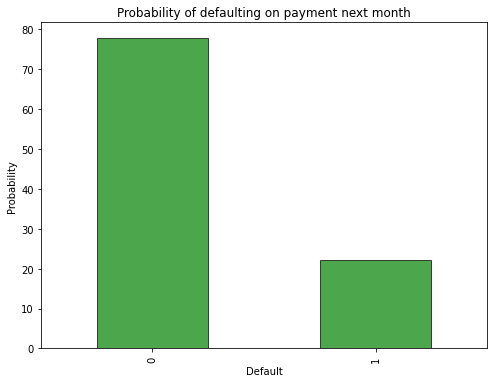

In [ ]:
plt.figure(figsize=(8,6))
prob_of_default= (credit_df['default'].value_counts(normalize=True)*100)
prob_of_default.plot.bar(color='g', ec='black', alpha=0.7)
plt.title('Probability of defaulting on payment next month')
plt.xlabel('Default')
plt.ylabel('Probability')


Approximately 22% of individuals in this dataset have defaulted on a credit card payment. The target variable is imbalanced, which means I will need to evaluate model performance with precision, recall, and f-scores. Now  take a look at the distribution of the numerical variables.

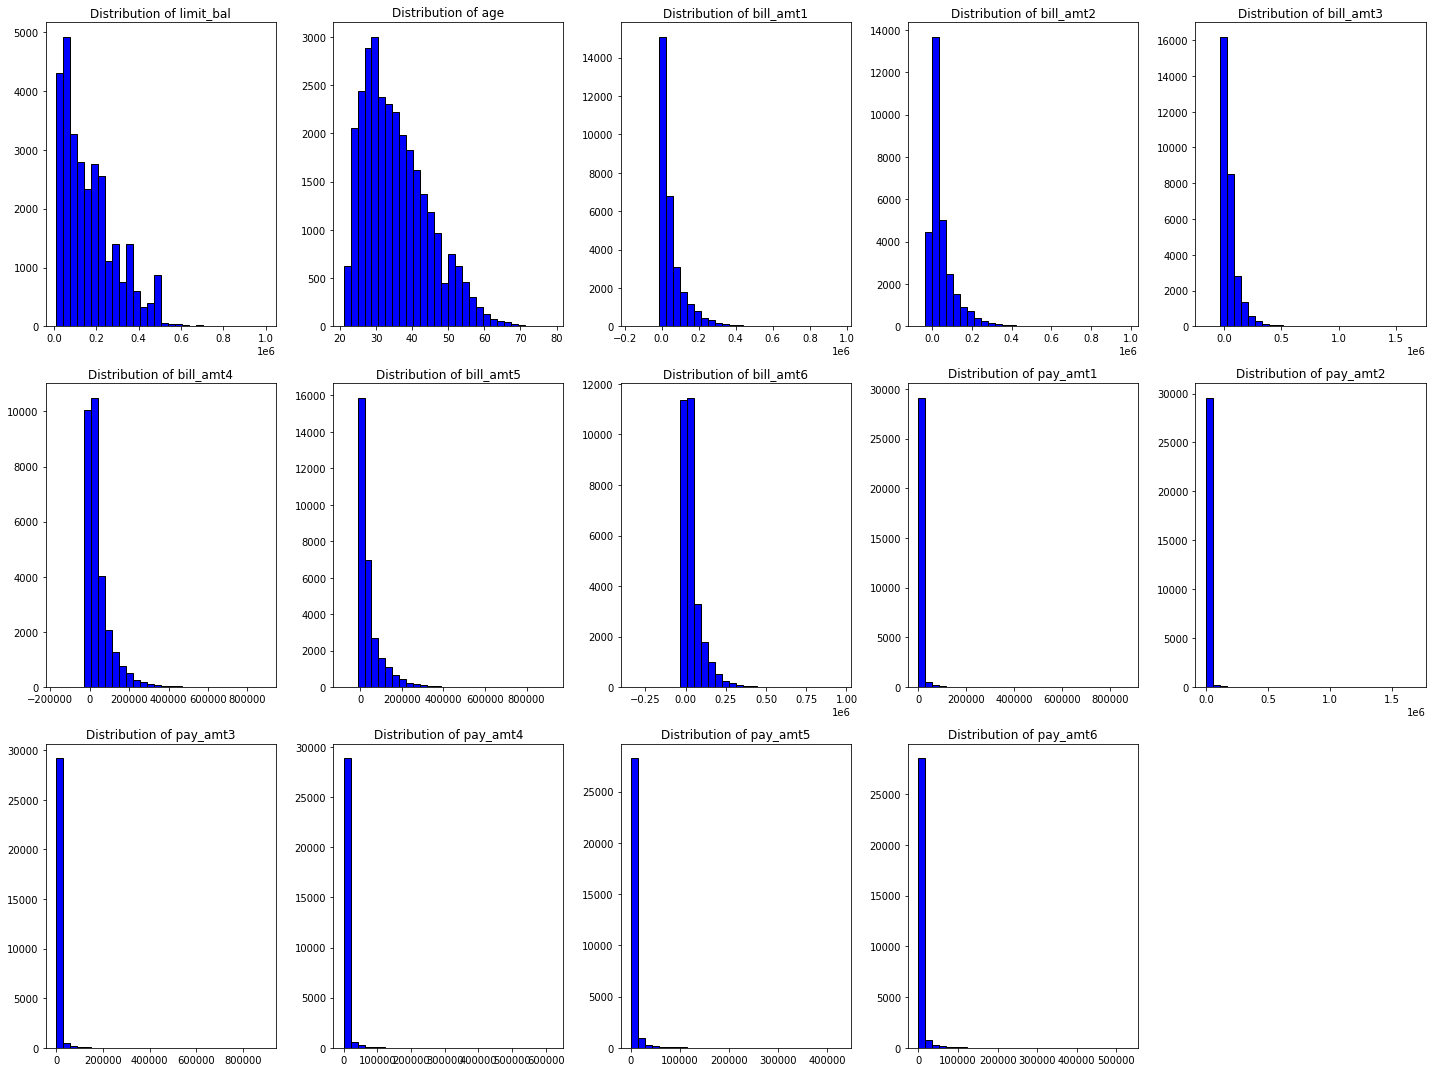

In [ ]:
# numerical data histograms after cleaning data
plt.figure(figsize=(20, 15))

var_list = num_vars.columns.unique()

for index, column in enumerate(var_list):
  plt.subplot(3,5,index+1)
  plt.hist(num_vars[column], color='b', ec='black', bins=30)
  plt.title('Distribution of {}'.format(column))
  plt.bar

plt.tight_layout()
plt.show()

Woah! The data is highly skewed to the right, specifically the monthly bill and payment amounts. It also looks like the most common value is 0 , with the exception of a few monthly bills. This means that the majority of individuals in this study on most months either have a bill of 0 or a payment amount of 0. Below I will check to see how skewed the data is for 

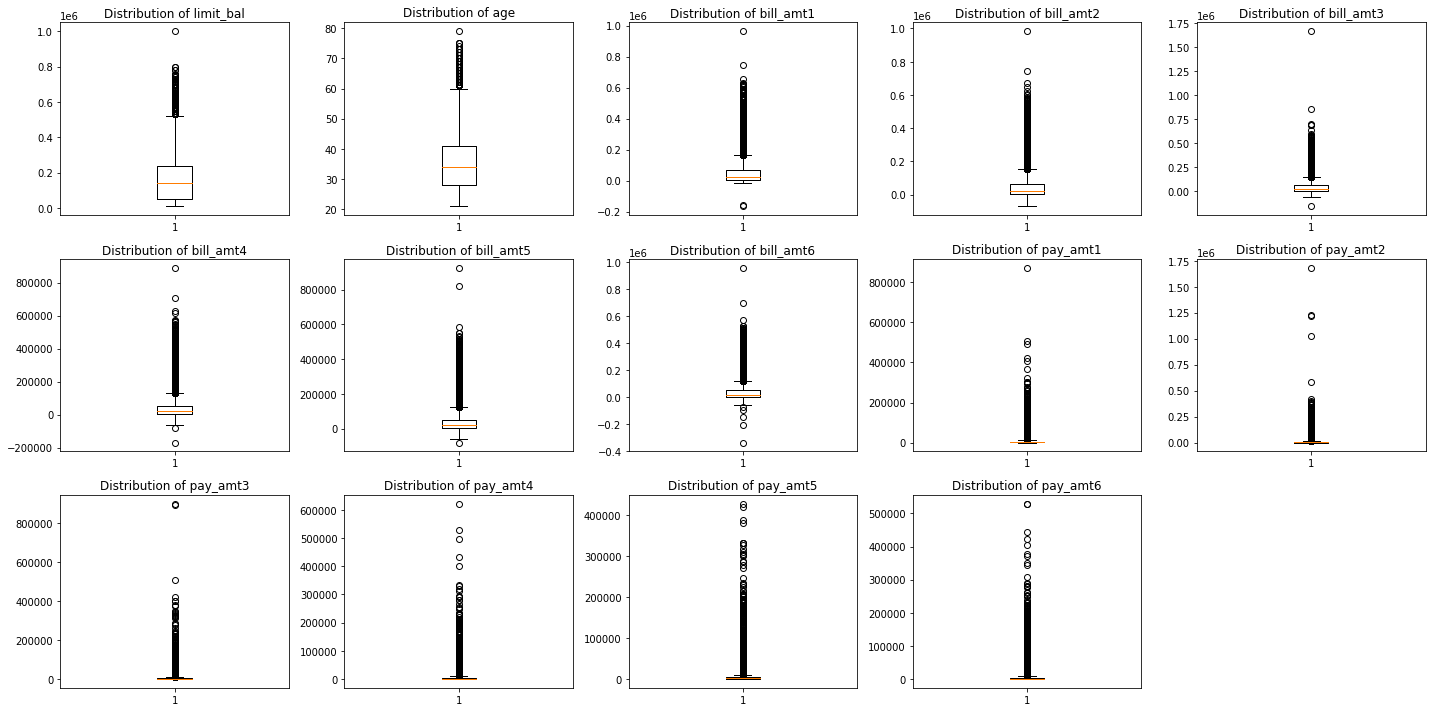

In [ ]:
plt.figure(figsize=(20,10))

var_list = num_vars.columns.unique()

for index, column in enumerate(var_list):
  plt.subplot(3,5,index+1)
  plt.boxplot(credit_df[column])
  plt.title('Distribution of {}'.format(column))

plt.tight_layout()
plt.show()

In [ ]:
num_vars.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"167,484.32",35.49,"51,223.33","49,179.08","47,013.15","43,262.95","40,311.40","38,871.76","5,663.58","5,921.16","5,225.68","4,826.08","4,799.39","5,215.50"
std,"129,747.66",9.22,"73,635.86","71,173.77","69,349.39","64,332.86","60,797.16","59,554.11","16,563.28","23,040.87","17,606.96","15,666.16","15,278.31","17,777.47"
min,"10,000.00",21.00,"-165,580.00","-69,777.00","-157,264.00","-170,000.00","-81,334.00","-339,603.00",0.00,0.00,0.00,0.00,0.00,0.00
25%,"50,000.00",28.00,"3,558.75","2,984.75","2,666.25","2,326.75","1,763.00","1,256.00","1,000.00",833.00,390.00,296.00,252.50,117.75
50%,"140,000.00",34.00,"22,381.50","21,200.00","20,088.50","19,052.00","18,104.50","17,071.00","2,100.00","2,009.00","1,800.00","1,500.00","1,500.00","1,500.00"
75%,"240,000.00",41.00,"67,091.00","64,006.25","60,164.75","54,506.00","50,190.50","49,198.25","5,006.00","5,000.00","4,505.00","4,013.25","4,031.50","4,000.00"
max,"1,000,000.00",79.00,"964,511.00","983,931.00","1,664,089.00","891,586.00","927,171.00","961,664.00","873,552.00","1,684,259.00","896,040.00","621,000.00","426,529.00","528,666.00"


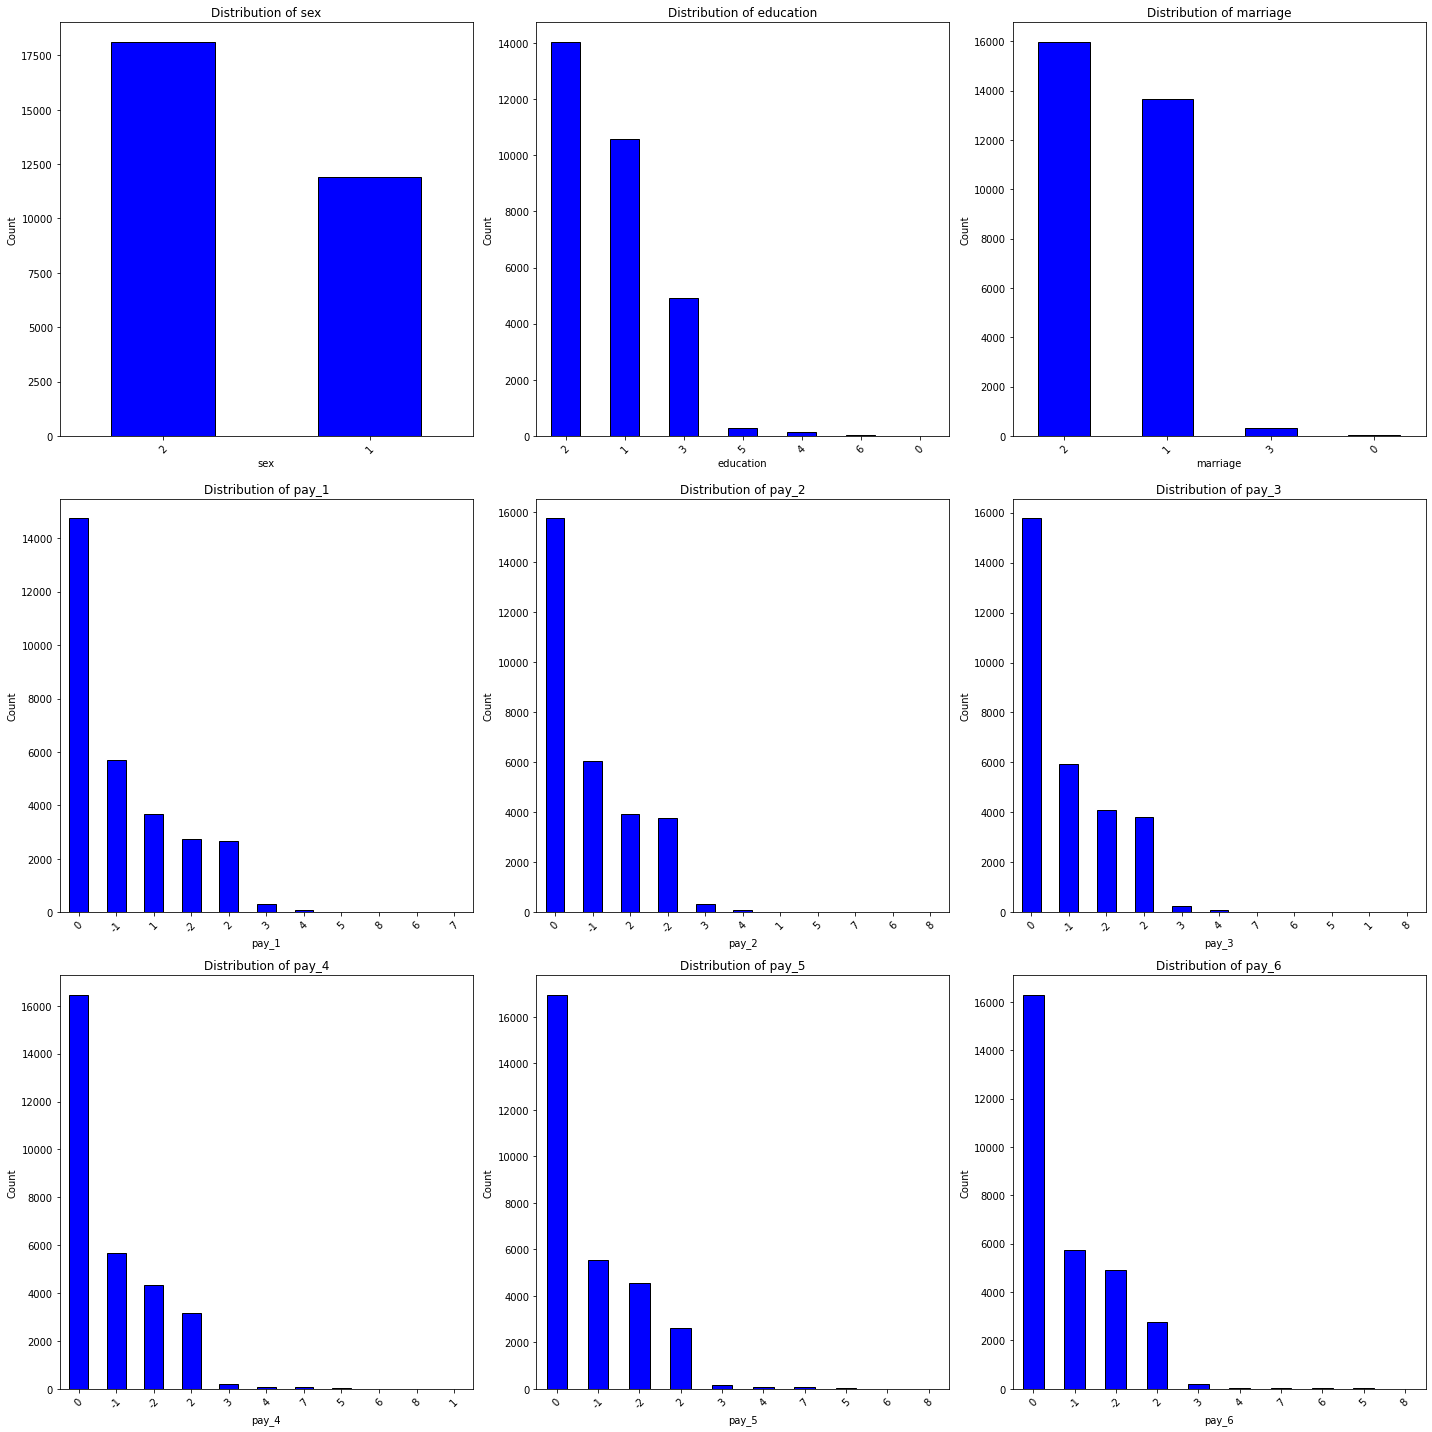

In [ ]:
# bar charts for categorical data
plt.figure(figsize=(20,20))

cat_list = cat_vars.columns.unique()

for index, column in enumerate(cat_list):
  plt.subplot(3,3,index+1)
  (credit_df[column].value_counts()).plot.bar(color='b', ec='black')
  plt.title('Distribution of {}'.format(column))
  plt.ylabel('Count')
  plt.xlabel(column)
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Looks like there are categories of education and marriage that are not mentioned in the documentation. How many samples are misclassified?

In [ ]:
len(credit_df[credit_df['education'] == 0])

14

In [ ]:
len(credit_df[credit_df['marriage'] == 0])

54

I'm going to exclude these from the dataset because there are only 68 values and they are likely misclassified.

In [ ]:
# removing 0 from marriage and education. Small number of samples and likely misclassified
credit_df = credit_df[credit_df['marriage'] != 0]
credit_df = credit_df[credit_df['education'] != 0]

Next, I want to group the 'Other' categories together as one 'Other category for pay and education.

In [ ]:
m = {-2:[-2], -1:[-1], 0:[0], 1:[1], 2:[2], 3:[3,4,5,6,7,8]}
m2 = {v: k for k,vv in m.items() for v in vv}
m2

{-2: -2, -1: -1, 0: 0, 1: 1, 2: 2, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3}

In [ ]:
credit_df.pay_1 = credit_df.pay_1.map(m2).astype('category')
credit_df.pay_2 = credit_df.pay_2.map(m2).astype('category')
credit_df.pay_3 = credit_df.pay_3.map(m2).astype('category')
credit_df.pay_4 = credit_df.pay_4.map(m2).astype('category')
credit_df.pay_5 = credit_df.pay_5.map(m2).astype('category')
credit_df.pay_6 = credit_df.pay_6.map(m2).astype('category')

In [ ]:
n = {1:[1], 2:[2], 3:[3], 4:[4,5,6]}
n2 = {v: k for k,vv in n.items() for v in vv}
n2

{1: 1, 2: 2, 3: 3, 4: 4, 5: 4, 6: 4}

In [ ]:
credit_df.education = credit_df.education.map(n2).astype('category')

Let's replot the categorical variables to look that the 

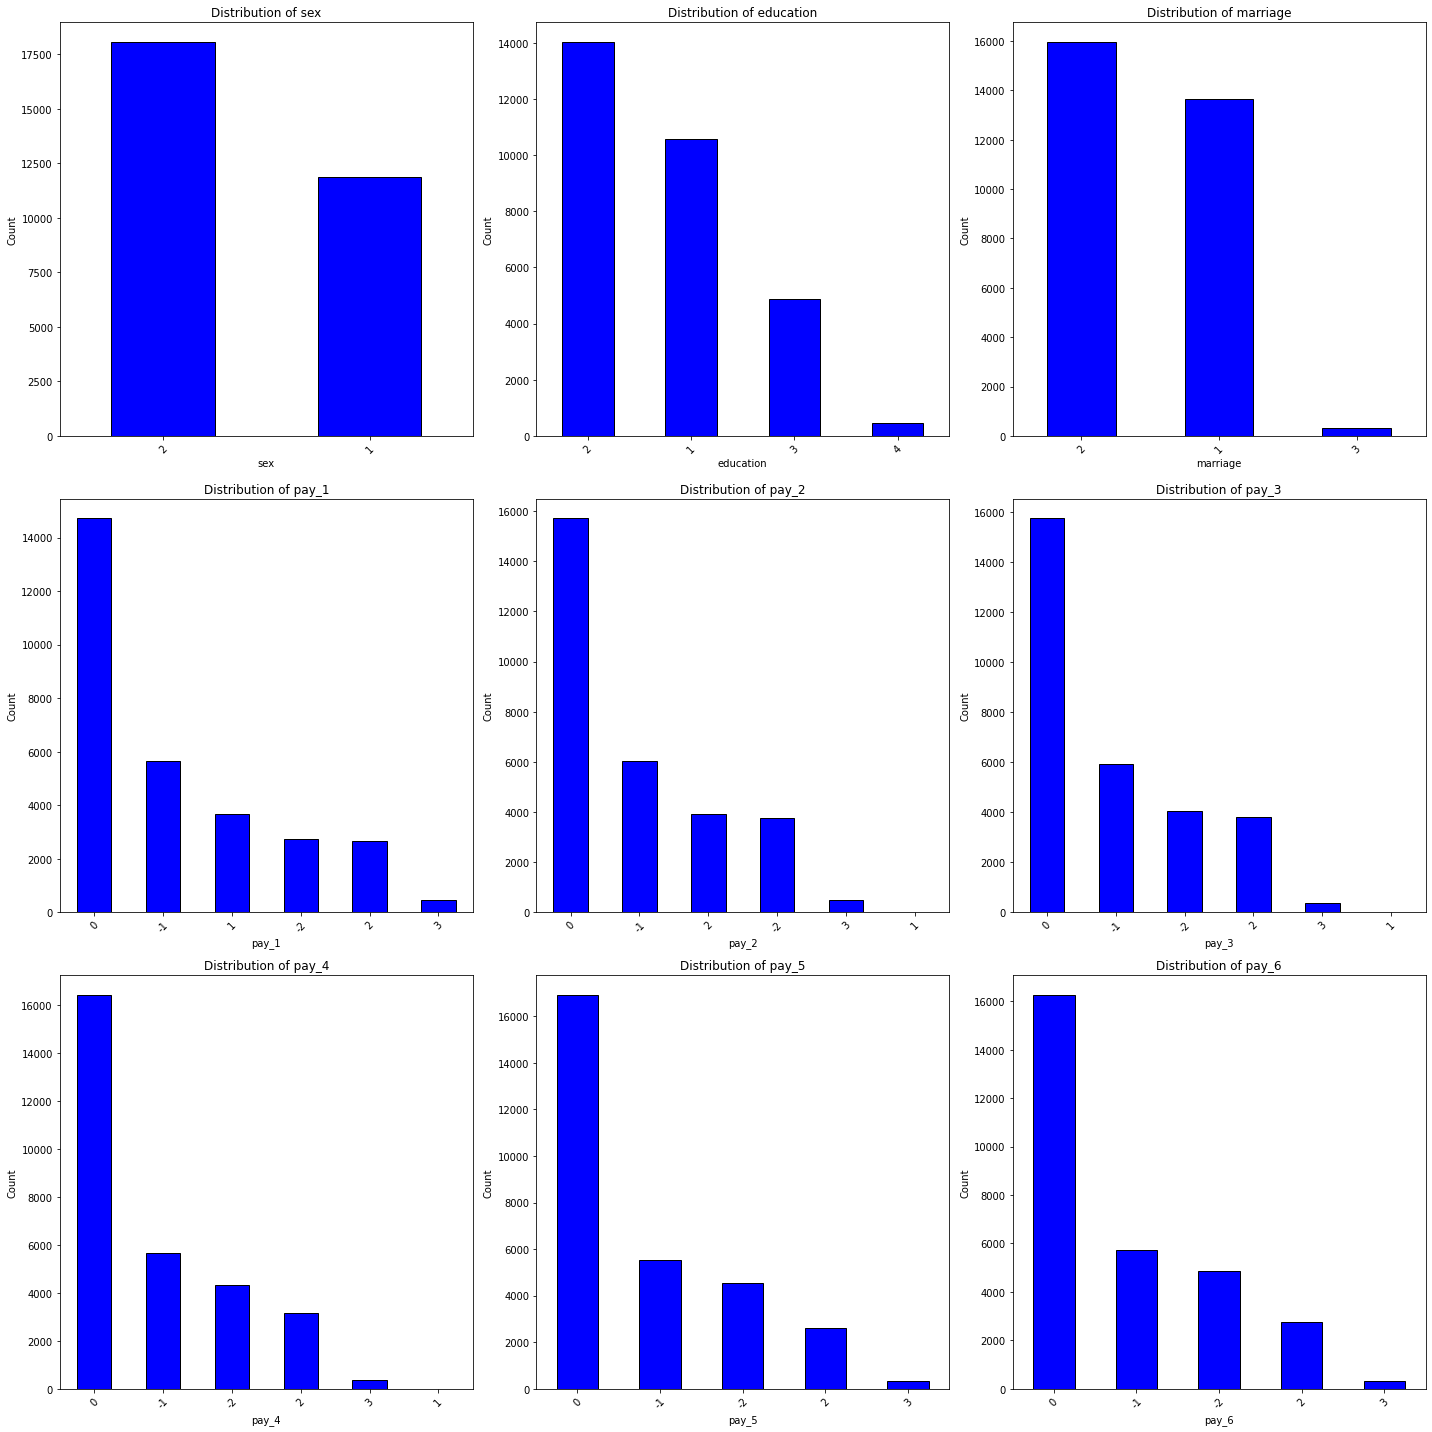

In [ ]:
# bar charts for categorical data
plt.figure(figsize=(20,20))

cat_vars = credit_df.drop(columns=['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 
                                   'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 
                                   'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'])

cat_list = cat_vars.columns.unique()

for index, column in enumerate(cat_list):
  plt.subplot(3,3,index+1)
  (credit_df[column].value_counts()).plot.bar(color='b', ec='black')
  plt.title('Distribution of {}'.format(column))
  plt.ylabel('Count')
  plt.xlabel(column)
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29932 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   limit_bal  29932 non-null  int64   
 1   sex        29932 non-null  object  
 2   education  29932 non-null  category
 3   marriage   29932 non-null  object  
 4   age        29932 non-null  int64   
 5   pay_1      29932 non-null  category
 6   pay_2      29932 non-null  category
 7   pay_3      29932 non-null  category
 8   pay_4      29932 non-null  category
 9   pay_5      29932 non-null  category
 10  pay_6      29932 non-null  category
 11  bill_amt1  29932 non-null  int64   
 12  bill_amt2  29932 non-null  int64   
 13  bill_amt3  29932 non-null  int64   
 14  bill_amt4  29932 non-null  int64   
 15  bill_amt5  29932 non-null  int64   
 16  bill_amt6  29932 non-null  int64   
 17  pay_amt1   29932 non-null  int64   
 18  pay_amt2   29932 non-null  int64   
 19  pay_amt3   29932 non-null

The strange part about this data set is that for 'pay_n' variables, there are two categories that are unlabeled in the documentation, 0 and -2. Will investigate further below.

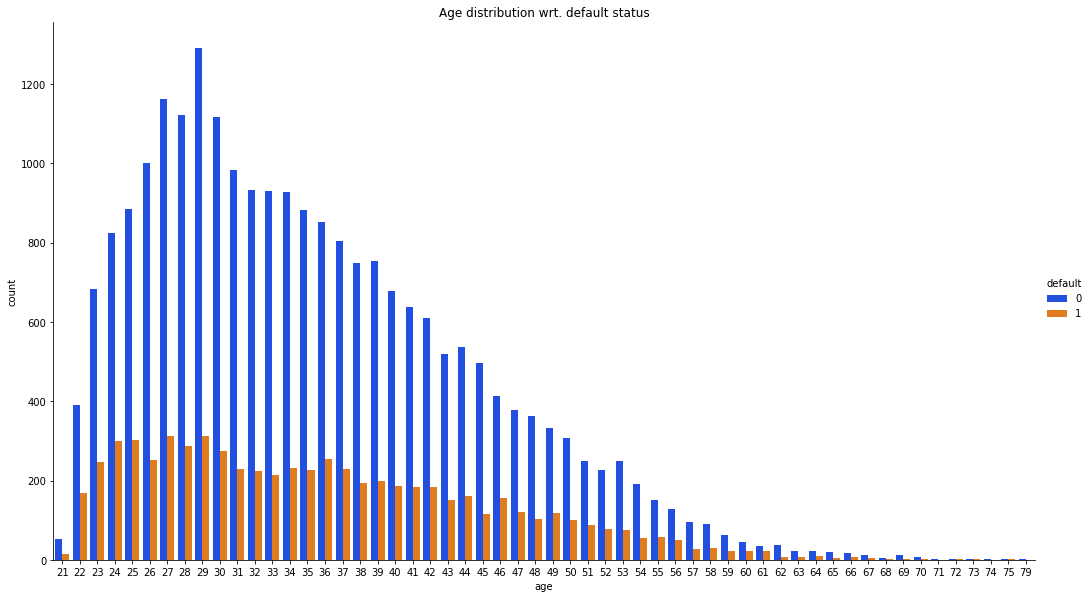

In [ ]:
g = sns.catplot(x="age", hue="default",
                data=credit_df, kind="count", height=8, aspect=1.8, palette='bright').set(title='Age distribution wrt. default status')

Text(0.5, 1.0, 'Comparing credit limit w/ education')

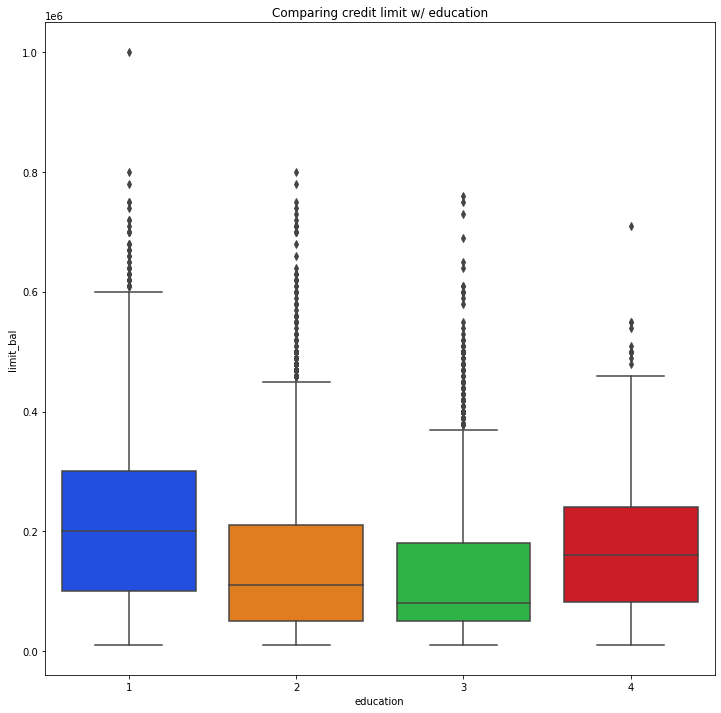

In [ ]:
# change to boxplot
plt.figure(figsize=(12,12))

sns.set_palette('bright')
b = sns.boxplot(x=credit_df['education'], y=credit_df['limit_bal'])

new_title = 'Comparing credit limit w/ education'
b.set_title(new_title)

In [ ]:
grouped_df = credit_df.groupby(['education']).agg({'limit_bal': ['mean', 'min', 'max']})
#grouped_df.columns = ['mean', 'min', 'max']
grouped_df.head(7)

limit_bal                
                mean    min      max
education                           
1         212,962.86  10000  1000000
2         147,040.50  10000   800000
3         126,623.78  10000   760000
4         180,211.45  10000   710000

Text(0.5, 1.0, 'Comparing credit limit and default status w/ sex')

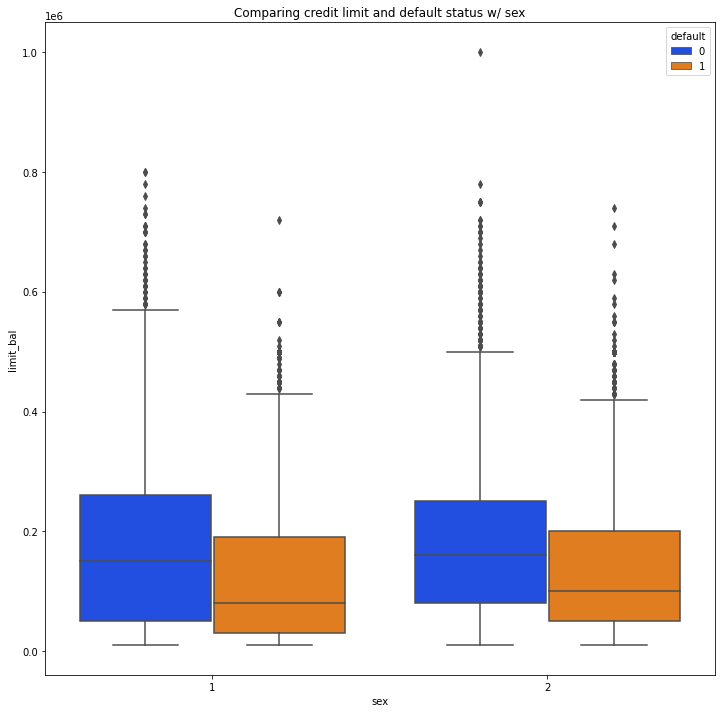

In [ ]:
plt.figure(figsize=(12,12))

sns.set_palette('bright')
b = sns.boxplot(x=credit_df['sex'], y=credit_df['limit_bal'], hue=credit_df['default'])

new_title = 'Comparing credit limit and default status w/ sex'
b.set_title(new_title)

Text(0.5, 1.0, 'Distribution of credit limit wrt. default')

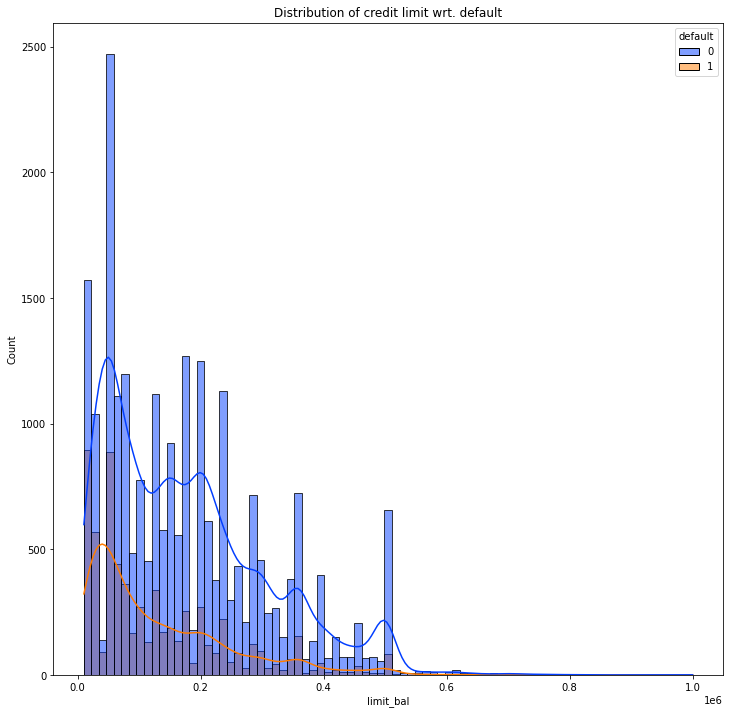

In [ ]:
plt.figure(figsize=(12,12))
h = sns.histplot(x=credit_df['limit_bal'], hue=credit_df['default'], kde=True)

new_title = 'Distribution of credit limit wrt. default'
h.set_title(new_title)

Text(0.5, 1.0, 'Distribution of credit limit wrt. marriage status')

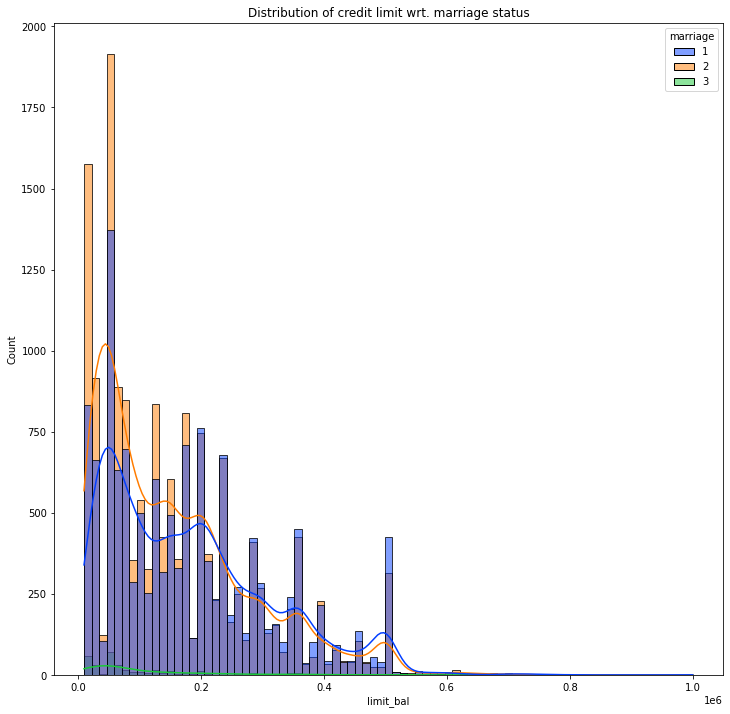

In [ ]:
plt.figure(figsize=(12,12))

h = sns.histplot(x=credit_df['limit_bal'], hue=credit_df['marriage'], kde=True, palette='bright')

new_title = 'Distribution of credit limit wrt. marriage status'
h.set_title(new_title)

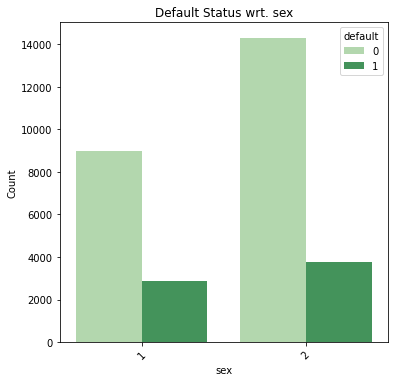

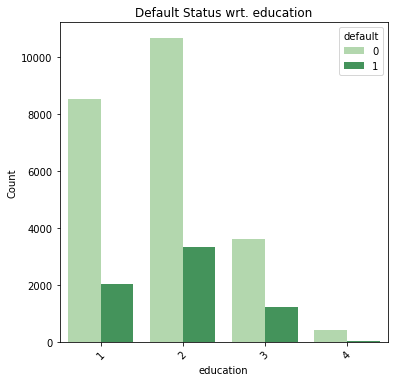

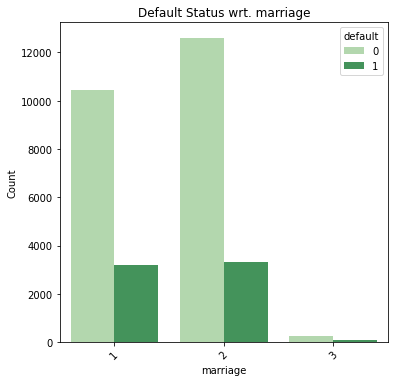

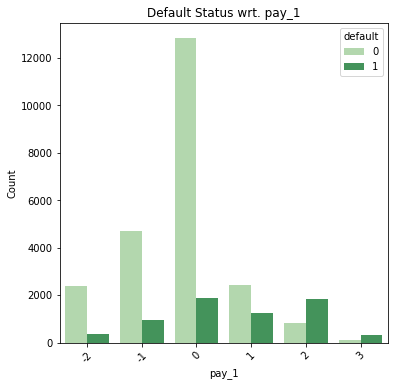

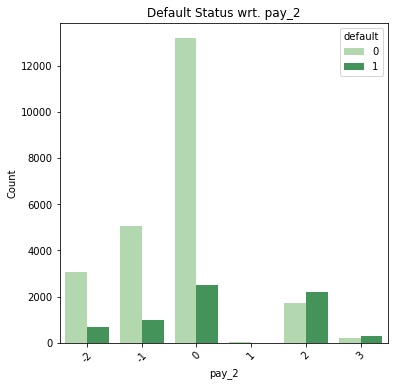

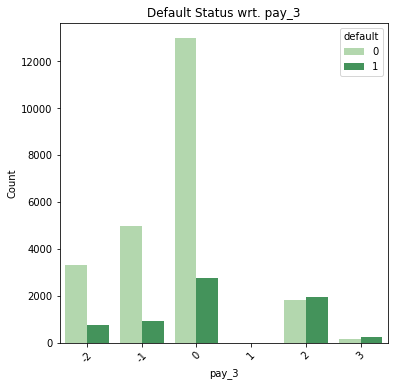

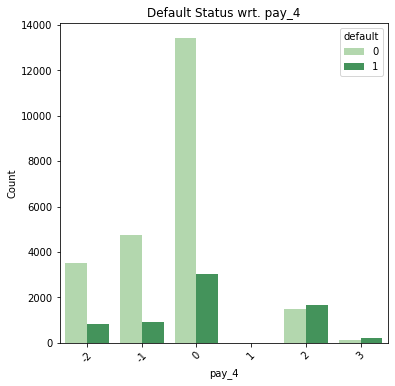

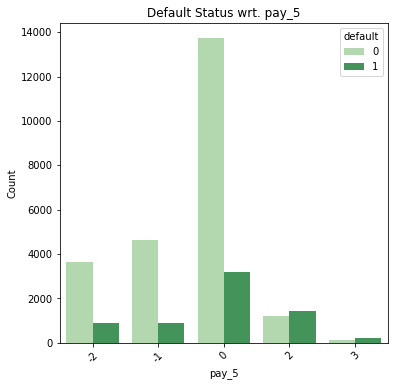

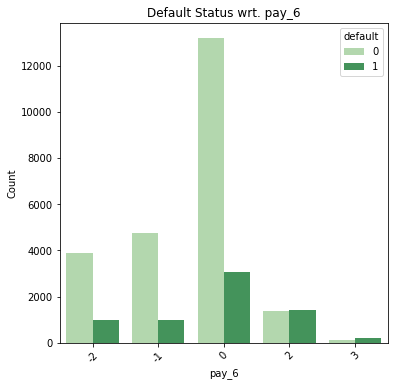

In [ ]:
for index, column in enumerate(cat_list):
  plt.figure(figsize=(20,20))
  plt.subplot(3,3,index+1)
  sns.countplot(x=column, hue="default", data=credit_df, palette='Greens')
  plt.title('Default Status wrt. {}'.format(column))
  plt.ylabel('Count')
  plt.xlabel(column)
  plt.xticks(rotation=45)


Investigating the existence of 0 and -2 for 'pay_n' variables. What is the relationship to bill amount and payment amount?

In [ ]:
pb = [a for a in credit_df if a.startswith('pay') | a.startswith('bill')]
pay_and_bill = credit_df[pb]
pay_and_bill.head(35)  

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
6,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
7,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
8,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542
9,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000
10,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0


After spending some time comparing payment status categories and bill/payment amounts, as well as additional research on Kaggle [7], I have a better understanding the categories for -2 and 0. -2 means the individual for that month did not have a bill. I confirmed this in the table above looking at payment amounts and bill amounts for months denoted as -2. Accoring to the Kaggle discussion, 0 means that the individual used revolving credit for a particular month. After further research revolving credit means the person paid the minimum credit card payment.

Creating two DataFrames for comparison of payment amounts and bill amounts. Will use these to create a percent bill paid feature.

In [ ]:
pay_amt = [p for p in credit_df if p.startswith('pay_amt')]
pay_amt_df = credit_df[pay_amt]
pay_amt_df.describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,"29,932.00","29,932.00","29,932.00","29,932.00","29,932.00","29,932.00"
mean,"5,659.60","5,923.50","5,226.16","4,830.18","4,805.27","5,221.91"
std,"16,555.87","23,060.20","17,620.77","15,680.85","15,294.07","17,795.29"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,000.00",836.00,390.00,298.00,255.00,122.00
50%,"2,100.00","2,010.00","1,800.00","1,500.00","1,500.00","1,500.00"
75%,"5,006.00","5,000.00","4,507.25","4,015.00","4,040.25","4,000.00"
max,"873,552.00","1,684,259.00","896,040.00","621,000.00","426,529.00","528,666.00"


In [ ]:
bill_amt = [b for b in credit_df if b.startswith('bill_amt')]
bill_amt_df = credit_df[bill_amt]
bill_amt_df.describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,"29,932.00","29,932.00","29,932.00","29,932.00","29,932.00","29,932.00"
mean,"51,297.39","49,242.86","47,077.03","43,320.70","40,367.55","38,927.27"
std,"73,694.49","71,230.37","69,404.73","64,385.86","60,845.49","59,601.23"
min,"-165,580.00","-69,777.00","-157,264.00","-170,000.00","-81,334.00","-339,603.00"
25%,"3,577.00","2,989.75","2,685.50","2,339.75","1,772.75","1,261.00"
50%,"22,420.50","21,234.50","20,111.50","19,068.50","18,125.50","17,111.50"
75%,"67,283.50","64,136.00","60,252.50","54,613.25","50,253.50","49,260.25"
max,"964,511.00","983,931.00","1,664,089.00","891,586.00","927,171.00","961,664.00"


## Feature Engineering

Creating a feature for the percentage of the bill the customer paid for a given month. Note: What i've noticed is that the payment amount month lags the bill amount month by one month. The code below reflects this payment lag.

In [ ]:
credit_df['pct_paidbill2'] = (pay_amt_df['pay_amt1']/bill_amt_df['bill_amt2'])*100
credit_df['pct_paidbill3'] = (pay_amt_df['pay_amt2']/bill_amt_df['bill_amt3'])*100
credit_df['pct_paidbill4'] = (pay_amt_df['pay_amt3']/bill_amt_df['bill_amt4'])*100
credit_df['pct_paidbill5'] = (pay_amt_df['pay_amt4']/bill_amt_df['bill_amt5'])*100
credit_df['pct_paidbill6'] = (pay_amt_df['pay_amt5']/bill_amt_df['bill_amt6'])*100

Next, I want to create a feature for the percent of credit limit used by a customer. Frequently, credit monitoring company's look at the percent of credit used per month by a customer. This is referred to as credit utilization. If a person's credit utilization is too high, this will reflect negatively in the their credit score. This might be a good predictor of a person's risk for default.

In [ ]:
credit_df['credit_util1'] = (bill_amt_df['bill_amt1']/credit_df['limit_bal'])*100
credit_df['credit_util2'] = (bill_amt_df['bill_amt2']/credit_df['limit_bal'])*100
credit_df['credit_util3'] = (bill_amt_df['bill_amt3']/credit_df['limit_bal'])*100
credit_df['credit_util4'] = (bill_amt_df['bill_amt4']/credit_df['limit_bal'])*100
credit_df['credit_util5'] = (bill_amt_df['bill_amt5']/credit_df['limit_bal'])*100
credit_df['credit_util6'] = (bill_amt_df['bill_amt6']/credit_df['limit_bal'])*100

In [ ]:
credit_df = credit_df.replace(np.inf, np.nan)
credit_df = credit_df.replace(np.nan, 200)

In [ ]:
credit_df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pct_paidbill2,pct_paidbill3,pct_paidbill4,pct_paidbill5,pct_paidbill6,credit_util1,credit_util2,credit_util3,credit_util4,credit_util5,credit_util6
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.00,100.00,200.00,200.00,200.00,19.56,15.51,3.45,0.00,0.00,0.00
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.00,37.29,30.56,28.94,0.00,2.23,1.44,2.23,2.73,2.88,2.72
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,10.82,11.06,6.98,6.69,6.43,32.49,15.59,15.07,15.92,16.61,17.28
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,4.15,4.10,4.24,3.80,3.62,93.98,96.47,98.58,56.63,57.92,59.09
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,35.27,102.36,47.76,47.01,3.60,17.23,11.34,71.67,41.88,38.29,38.26


Many of the distributions are highly skewed to the right. Creating box plots for each variable to understand the amount of outliers. 

In [ ]:
q75, q25 = np.percentile(credit_df['bill_amt1'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((credit_df['limit_bal'] > max_val) 
                      | (credit_df['limit_bal'] < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 15423
The score threshold is: 1.5
Number of outliers is: 12876
The score threshold is: 2.0
Number of outliers is: 11124
The score threshold is: 2.5
Number of outliers is: 8410
The score threshold is: 3.0
Number of outliers is: 6709
The score threshold is: 3.5
Number of outliers is: 5112
The score threshold is: 4.0
Number of outliers is: 3976
The score threshold is: 4.5
Number of outliers is: 3355


The distribution of the bill amounts has many outliers on both ends of the distribution. I'll winsorize these variables to handle the outliers. I'll add these outliers to the 5th and 95th percentiles of the data.

In [ ]:
# winsorize bill amounts
winsor_list = bill_amt_df.columns.unique()

for d in winsor_list:
    credit_df['winsorized_{}'.format(d)] = winsorize(credit_df[d], limits=[0.05, 0.05])
    #credit_df = credit_df.drop(columns=d)

In [ ]:
q75, q25 = np.percentile(credit_df['winsorized_bill_amt1'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((credit_df['winsorized_bill_amt1'] > max_val) 
                      | (credit_df['winsorized_bill_amt1'] < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 3467
The score threshold is: 1.5
Number of outliers is: 2381
The score threshold is: 2.0
Number of outliers is: 1638
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


Comparing bill amount1 before and after the winsorization, the outliers are significantly reduced.

Looking at the credit utilization features created, I notice that some customers have greater than 100% credit utilization each month. After some research [3] I learn that a person can exceed his or her credit limit, but it requires calling the bank and either a. getting approval for a specific purchase that will exceed the limit or b. remove the penalty and card decline from the account. I assume there is some type of review process by the bank for allowing customers to exceed a limit. I'm going to look at the distribution of individuals that exceed their limit and whether or not they default.  

In [ ]:
util_list = [c for c in credit_df if c.startswith('credit')]

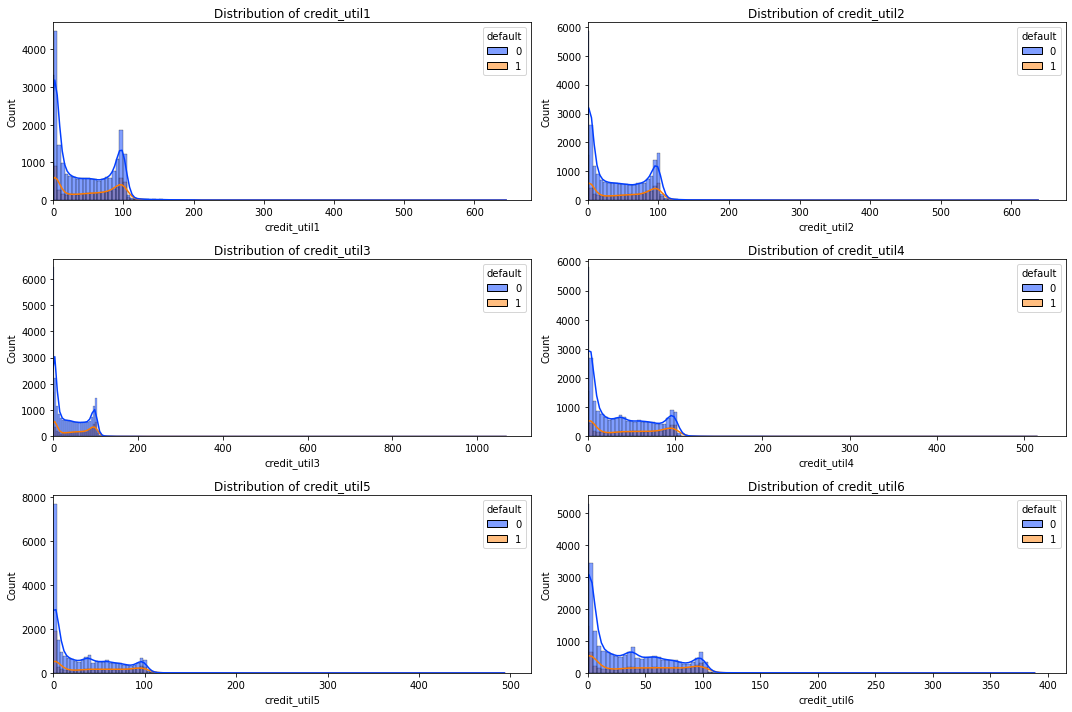

In [ ]:
# numerical data histograms after cleaning data
plt.figure(figsize=(15, 10))

for index, column in enumerate(util_list):
  plt.subplot(3,2,index+1)
  sns.histplot(data=credit_df, x=column, hue='default', kde=True)
  plt.title('Distribution of {}'.format(column))
  plt.xlim(left=0)

plt.tight_layout()
plt.show()

In [ ]:
credit_df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pct_paidbill2,pct_paidbill3,pct_paidbill4,pct_paidbill5,pct_paidbill6,credit_util1,credit_util2,credit_util3,credit_util4,credit_util5,credit_util6,winsorized_bill_amt1,winsorized_bill_amt2,winsorized_bill_amt3,winsorized_bill_amt4,winsorized_bill_amt5,winsorized_bill_amt6
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.00,100.00,200.00,200.00,200.00,19.56,15.51,3.45,0.00,0.00,0.00,3913,3102,689,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.00,37.29,30.56,28.94,0.00,2.23,1.44,2.23,2.73,2.88,2.72,2682,1725,2682,3272,3455,3261
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,10.82,11.06,6.98,6.69,6.43,32.49,15.59,15.07,15.92,16.61,17.28,29239,14027,13559,14331,14948,15549
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,4.15,4.10,4.24,3.80,3.62,93.98,96.47,98.58,56.63,57.92,59.09,46990,48233,49291,28314,28959,29547
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,35.27,102.36,47.76,47.01,3.60,17.23,11.34,71.67,41.88,38.29,38.26,8617,5670,35835,20940,19146,19131


I'm going to create a few new features from existing pay and bill amounts. Total_pay is the sum of the 6 months of payments. Total_bill is the sum of the 6 months of bills. Pct_bill_paid is the total percentage of bill paid by a customer over the course of 6 months.

In [ ]:
credit_df['total_pay'] = credit_df['pay_amt1'] + credit_df['pay_amt2'] + credit_df['pay_amt3'] + credit_df['pay_amt4'] + credit_df['pay_amt5'] + credit_df['pay_amt6']
credit_df['total_bill'] = credit_df['bill_amt1'] + credit_df['bill_amt2'] + credit_df['bill_amt3'] + credit_df['bill_amt4'] + credit_df['bill_amt5'] + credit_df['bill_amt6']
credit_df['pct_bill_paid'] = (credit_df['total_pay']/credit_df['total_bill']) * 100
credit_df.head(5)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pct_paidbill2,pct_paidbill3,pct_paidbill4,pct_paidbill5,pct_paidbill6,credit_util1,credit_util2,credit_util3,credit_util4,credit_util5,credit_util6,winsorized_bill_amt1,winsorized_bill_amt2,winsorized_bill_amt3,winsorized_bill_amt4,winsorized_bill_amt5,winsorized_bill_amt6,total_pay,total_bill,pct_bill_paid
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.00,100.00,200.00,200.00,200.00,19.56,15.51,3.45,0.00,0.00,0.00,3913,3102,689,0,0,0,689,7704,8.94
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.00,37.29,30.56,28.94,0.00,2.23,1.44,2.23,2.73,2.88,2.72,2682,1725,2682,3272,3455,3261,5000,17077,29.28
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,10.82,11.06,6.98,6.69,6.43,32.49,15.59,15.07,15.92,16.61,17.28,29239,14027,13559,14331,14948,15549,11018,101653,10.84
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,4.15,4.10,4.24,3.80,3.62,93.98,96.47,98.58,56.63,57.92,59.09,46990,48233,49291,28314,28959,29547,8388,231334,3.63
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,35.27,102.36,47.76,47.01,3.60,17.23,11.34,71.67,41.88,38.29,38.26,8617,5670,35835,20940,19146,19131,59049,109339,54.01


I'm going to double check to see if there are any null values in the feature I just created.

In [ ]:
credit_df.isnull().sum().sort_values(ascending=False)

pct_bill_paid           793
total_bill                0
pay_amt3                  0
pay_amt2                  0
pay_amt1                  0
bill_amt6                 0
bill_amt5                 0
bill_amt4                 0
bill_amt3                 0
bill_amt2                 0
bill_amt1                 0
pay_6                     0
pay_5                     0
pay_4                     0
pay_3                     0
pay_2                     0
pay_1                     0
age                       0
marriage                  0
education                 0
sex                       0
pay_amt4                  0
pay_amt5                  0
pay_amt6                  0
credit_util5              0
total_pay                 0
winsorized_bill_amt6      0
winsorized_bill_amt5      0
winsorized_bill_amt4      0
winsorized_bill_amt3      0
winsorized_bill_amt2      0
winsorized_bill_amt1      0
credit_util6              0
credit_util4              0
default                   0
credit_util3        

Looks like there are 793 null values for the 'pct_bill_paid' feature. I'll replace these nulls with 200 (or 200% of the bill paid). These values are null because the person for this month does not have a bill. In many cases the individual pays a certain amount even if they have no bill.

In [ ]:
credit_df = credit_df.replace(np.inf, np.nan)
credit_df = credit_df.replace(np.nan, 200)

In [ ]:
credit_df.isnull().sum().sort_values(ascending=False)

pct_bill_paid           0
total_bill              0
pay_amt3                0
pay_amt2                0
pay_amt1                0
bill_amt6               0
bill_amt5               0
bill_amt4               0
bill_amt3               0
bill_amt2               0
bill_amt1               0
pay_6                   0
pay_5                   0
pay_4                   0
pay_3                   0
pay_2                   0
pay_1                   0
age                     0
marriage                0
education               0
sex                     0
pay_amt4                0
pay_amt5                0
pay_amt6                0
credit_util5            0
total_pay               0
winsorized_bill_amt6    0
winsorized_bill_amt5    0
winsorized_bill_amt4    0
winsorized_bill_amt3    0
winsorized_bill_amt2    0
winsorized_bill_amt1    0
credit_util6            0
credit_util4            0
default                 0
credit_util3            0
credit_util2            0
credit_util1            0
pct_paidbill

Need to create dummy variables for categorical data.

In [ ]:
for x in cat_list:
    credit_df = pd.concat([credit_df, pd.get_dummies(credit_df[x], prefix=x, drop_first=True)], axis=1)

credit_df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pct_paidbill2,pct_paidbill3,pct_paidbill4,pct_paidbill5,pct_paidbill6,credit_util1,credit_util2,credit_util3,credit_util4,credit_util5,credit_util6,winsorized_bill_amt1,winsorized_bill_amt2,winsorized_bill_amt3,winsorized_bill_amt4,winsorized_bill_amt5,winsorized_bill_amt6,total_pay,total_bill,pct_bill_paid,sex_2,education_2,education_3,education_4,marriage_2,marriage_3,pay_1_-1,pay_1_0,pay_1_1,pay_1_2,pay_1_3,pay_2_-1,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_3_-1,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_4_-1,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_5_-1,pay_5_0,pay_5_2,pay_5_3,pay_6_-1,pay_6_0,pay_6_2,pay_6_3
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.00,100.00,200.00,200.00,200.00,19.56,15.51,3.45,0.00,0.00,0.00,3913,3102,689,0,0,0,689,7704,8.94,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.00,37.29,30.56,28.94,0.00,2.23,1.44,2.23,2.73,2.88,2.72,2682,1725,2682,3272,3455,3261,5000,17077,29.28,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,10.82,11.06,6.98,6.69,6.43,32.49,15.59,15.07,15.92,16.61,17.28,29239,14027,13559,14331,14948,15549,11018,101653,10.84,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,4.15,4.10,4.24,3.80,3.62,93.98,96.47,98.58,56.63,57.92,59.09,46990,48233,49291,28314,28959,29547,8388,231334,3.63,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,35.27,102.36,47.76,47.01,3.60,17.23,11.34,71.67,41.88,38.29,38.26,8617,5670,35835,20940,19146,19131,59049,109339,54.01,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


Remove dummy inputs

In [ ]:
credit_df = credit_df.drop(columns=['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])

In [ ]:
credit_df.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pct_paidbill2,pct_paidbill3,pct_paidbill4,pct_paidbill5,pct_paidbill6,credit_util1,credit_util2,credit_util3,credit_util4,credit_util5,credit_util6,winsorized_bill_amt1,winsorized_bill_amt2,winsorized_bill_amt3,winsorized_bill_amt4,winsorized_bill_amt5,winsorized_bill_amt6,total_pay,total_bill,pct_bill_paid,sex_2,education_2,education_3,education_4,marriage_2,marriage_3,pay_1_-1,pay_1_0,pay_1_1,pay_1_2,pay_1_3,pay_2_-1,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_3_-1,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_4_-1,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_5_-1,pay_5_0,pay_5_2,pay_5_3,pay_6_-1,pay_6_0,pay_6_2,pay_6_3
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.00,100.00,200.00,200.00,200.00,19.56,15.51,3.45,0.00,0.00,0.00,3913,3102,689,0,0,0,689,7704,8.94,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.00,37.29,30.56,28.94,0.00,2.23,1.44,2.23,2.73,2.88,2.72,2682,1725,2682,3272,3455,3261,5000,17077,29.28,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,10.82,11.06,6.98,6.69,6.43,32.49,15.59,15.07,15.92,16.61,17.28,29239,14027,13559,14331,14948,15549,11018,101653,10.84,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,4.15,4.10,4.24,3.80,3.62,93.98,96.47,98.58,56.63,57.92,59.09,46990,48233,49291,28314,28959,29547,8388,231334,3.63,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,35.27,102.36,47.76,47.01,3.60,17.23,11.34,71.67,41.88,38.29,38.26,8617,5670,35835,20940,19146,19131,59049,109339,54.01,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


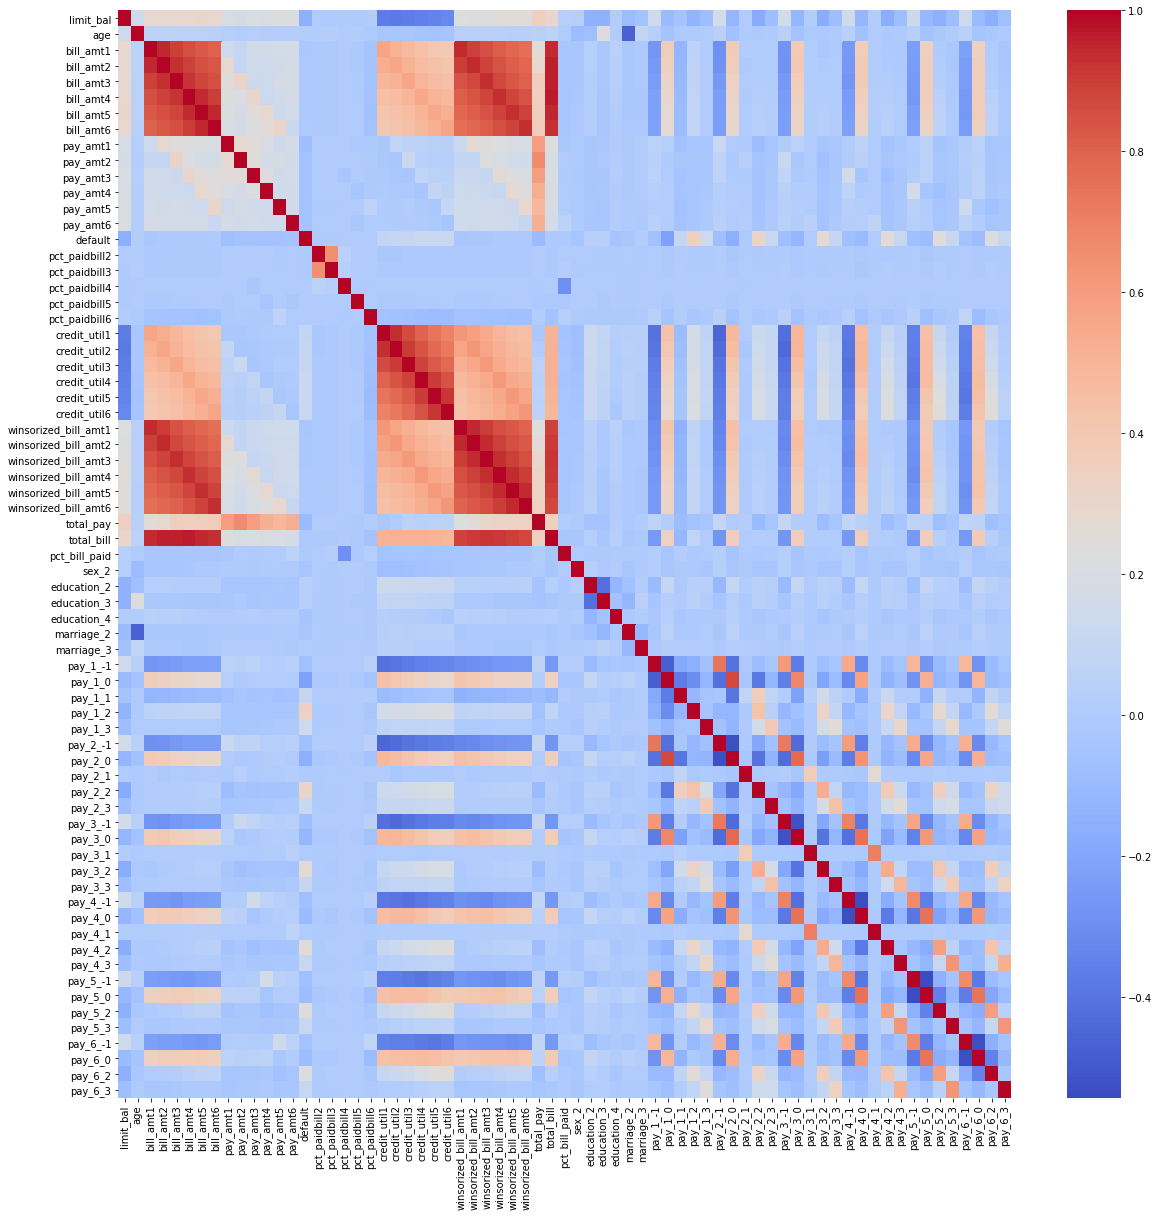

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(credit_df.corr(), cmap='coolwarm', cbar=True)

In [ ]:
len(credit_df.columns.unique())

69

## Principal Components Analysis (PCA)

In [ ]:
X = credit_df.drop(columns='default')

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=0.95) # keep variables the explain 95% of the variance

In [ ]:
sklearn_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
len(sklearn_pca.explained_variance_ratio_)

39

In [ ]:
X_transform = sklearn_pca.fit_transform(X) # transformed variable with 39 principle components

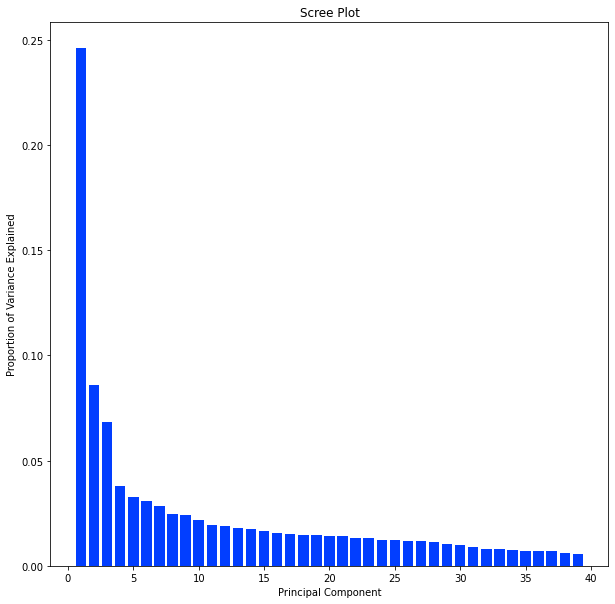

In [ ]:
pca_vals = np.arange(sklearn_pca.n_components_) + 1
plt.figure(figsize=(10,10))
plt.bar(pca_vals, sklearn_pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

## Supervised ML Models
I'm going to be implementing several models to predict the target variable. This section will use Logistic Regression, KNN Classifiers, Support Vector Classifiers, Random Forrests, and Boosting. 

In [ ]:
# split data into train and test
X = X_transform
y = credit_df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### *Logistic Regression*

Run an initial lr model with random inputs

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=500, random_state=42)
lr.fit(X_train, y_train)

print('Accuracy Score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

Accuracy Score: 0.8187740103557708
# of iterations 62


Create a confusion matrix to compare precision and recall. The target variable is imbalanced.

In [ ]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[ 406  858]
 [ 227 4496]]


In [ ]:
# confusion matrix code taken from scikit-learn [6].
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

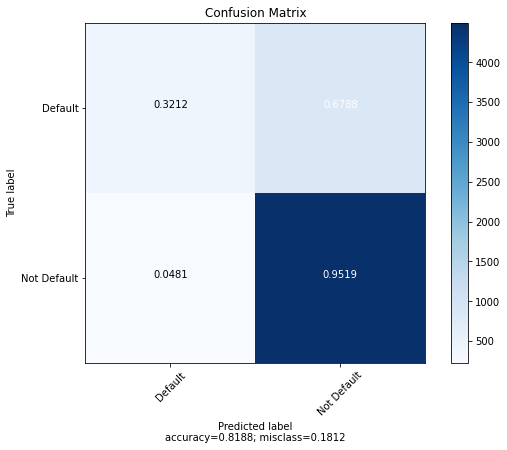

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = ['Default', 'Not Default'], title = 'Confusion Matrix',normalize=True)

In [ ]:
# classification report for initial model
report = classification_report(y_test, predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      4723
     Default       0.64      0.32      0.43      1264

    accuracy                           0.82      5987
   macro avg       0.74      0.64      0.66      5987
weighted avg       0.80      0.82      0.79      5987



In [ ]:
#AUC score for initial model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.6365699298075402

I will try to improve the model using GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

params = [{'C': np.logspace(-4,4,20),
          'penalty':['l2'],
          'solver': ['liblinear'],
          'max_iter': [100, 500, 1000]}]
clf = GridSearchCV(lr, params, cv=3, verbose=True, n_jobs=3)
results = clf.fit(X_train, y_train)
results.best_score_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.9s
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:  2.9min finished


0.8187512189776117

In [ ]:
results.best_params_

{'C': 0.0018329807108324356,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

Let's input the improved parameters into the new lr model

In [ ]:
lr = LogisticRegression(solver='saga', penalty='l2', C=0.00183, max_iter=100, random_state=0)
lr.fit(X_train, y_train)

print('Accuracy Score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

Accuracy Score: 0.819108067479539
# of iterations 88


In [ ]:
Train_predictions = lr.predict(X_train)
Test_predictions = lr.predict(X_test)

train_confusion = confusion_matrix(y_train, Train_predictions, labels=[1,0])
test_confusion = confusion_matrix(y_test, Test_predictions, labels=[1,0])
print(train_confusion)
print(test_confusion)

[[ 1758  3609]
 [  797 17781]]
[[ 386  878]
 [ 205 4518]]


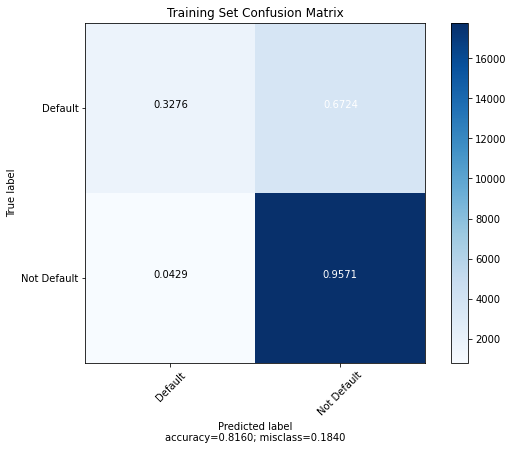

In [ ]:
plot_confusion_matrix(cm=train_confusion, target_names = ['Default', 'Not Default'], title = 'Training Set Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_train, Train_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.83      0.96      0.89     18578
     Default       0.69      0.33      0.44      5367

    accuracy                           0.82     23945
   macro avg       0.76      0.64      0.67     23945
weighted avg       0.80      0.82      0.79     23945



The model still isn't doing a great job correctly identifying people who default (low precision).

In [ ]:
roc_auc_score(y_train, Train_predictions)

0.6423285450174844

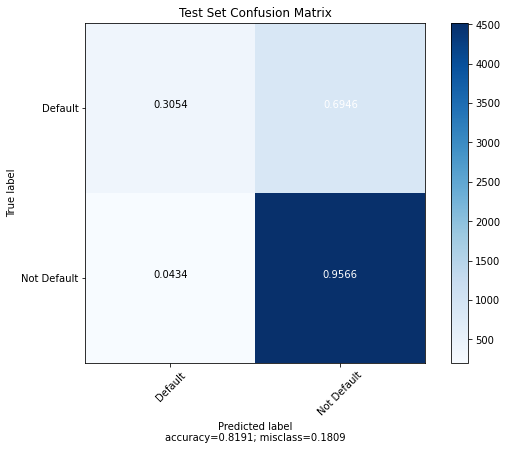

In [ ]:
plot_confusion_matrix(cm=test_confusion, target_names = ['Default', 'Not Default'], title = 'Test Set Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_test, Test_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.96      0.89      4723
     Default       0.65      0.31      0.42      1264

    accuracy                           0.82      5987
   macro avg       0.75      0.63      0.65      5987
weighted avg       0.80      0.82      0.79      5987



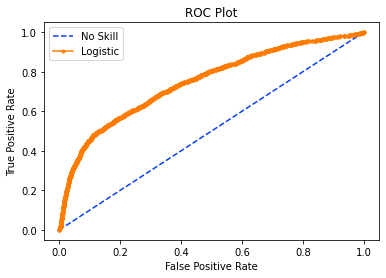

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# predict probabilities
yhat = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
lr_auc = roc_auc_score(y_test, Test_predictions)

Now we'll look at feature importances for the final lr model.

In [ ]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]

In [ ]:
importance = lr.coef_[0]

In [ ]:
lr_import = pd.DataFrame(data=importance, index=feature_names)
lr_import

,0
feature 0,-0.01
feature 1,-0.22
feature 2,0.33
feature 3,-0.09
feature 4,-0.06
feature 5,-0.12
feature 6,0.02
feature 7,0.04
feature 8,-0.05
feature 9,-0.09


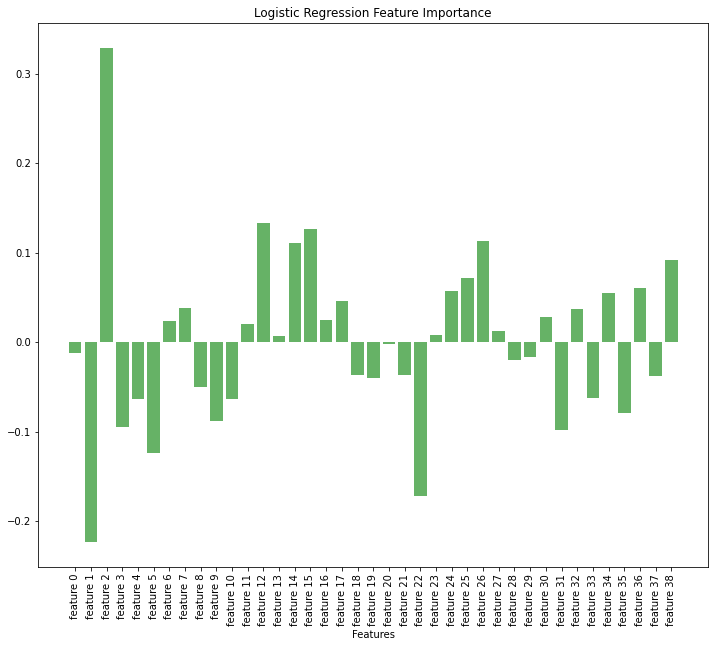

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(x=lr_import.index, height=lr_import[0], color='g', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Features')
plt.show()

In [ ]:
# this code will be used in the results section to compare ROC plots
y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba_lr)
auc1 = roc_auc_score(y_test, y_pred_proba_lr)

#### *KNN Classifiers*

In [ ]:
# initial model for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train,y_train)

print('training score: {:.3f}'.format(knn.score(X_train, y_train)))
print('test score: {:.3f}'.format(knn.score(X_test, y_test)))

training score: 0.821
test score: 0.817


In [ ]:
Train_predictions = knn.predict(X_train)
Test_predictions = knn.predict(X_test)

train_confusion = confusion_matrix(y_train, Train_predictions, labels=[1,0])
test_confusion = confusion_matrix(y_test, Test_predictions, labels=[1,0])
print(train_confusion)
print(test_confusion)

[[ 1919  3448]
 [  839 17739]]
[[ 396  868]
 [ 230 4493]]


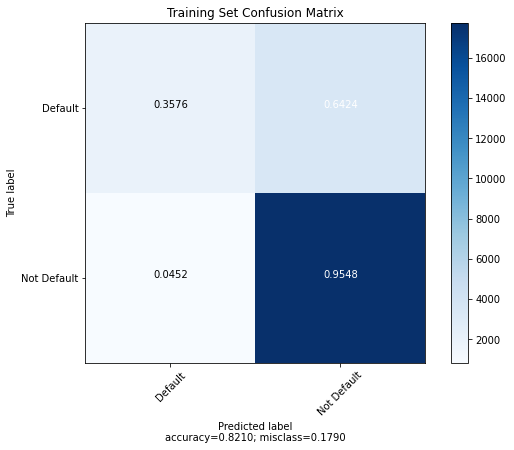

In [ ]:
plot_confusion_matrix(cm=train_confusion, target_names = ['Default', 'Not Default'], title = 'Training Set Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_train, Train_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89     18578
     Default       0.70      0.36      0.47      5367

    accuracy                           0.82     23945
   macro avg       0.77      0.66      0.68     23945
weighted avg       0.81      0.82      0.80     23945



In [ ]:
roc_auc_score(y_train, Train_predictions)

0.6561972441443739

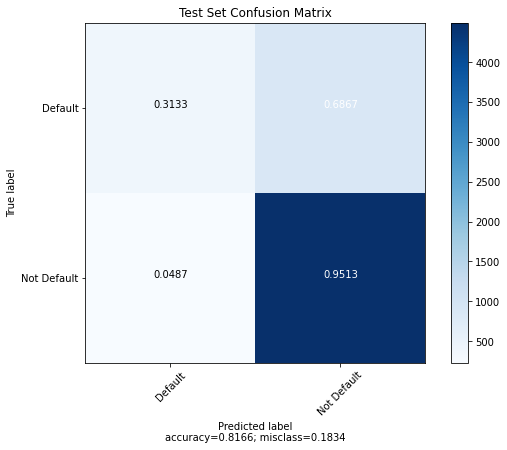

In [ ]:
plot_confusion_matrix(cm=test_confusion, target_names = ['Default', 'Not Default'], title = 'Test Set Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_test, Test_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      4723
     Default       0.63      0.31      0.42      1264

    accuracy                           0.82      5987
   macro avg       0.74      0.63      0.66      5987
weighted avg       0.79      0.82      0.79      5987



In [ ]:
# this takes a long time to run
knn = KNeighborsClassifier()

n_list = list(np.arange(5,55,10).astype(int))
leaf_list = list(np.arange(10,100,10).astype(int))

params = [{'n_neighbors': n_list, 'weights':['uniform', 'distance'],'leaf_size': leaf_list}]
clf = GridSearchCV(knn, params, cv=3, verbose=True, n_jobs=-1)
results = clf.fit(X_train, y_train)
results.best_score_

In [ ]:
results.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 35, leaf_size=10, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [ ]:
Train_predictions = knn.predict(X_train)
Test_predictions = knn.predict(X_test)

train_confusion = confusion_matrix(y_train, Train_predictions, labels=[1,0])
test_confusion = confusion_matrix(y_test, Test_predictions, labels=[1,0])
print(train_confusion)
print(test_confusion)

[[ 2005  3362]
 [  894 17684]]
[[ 409  855]
 [ 244 4479]]


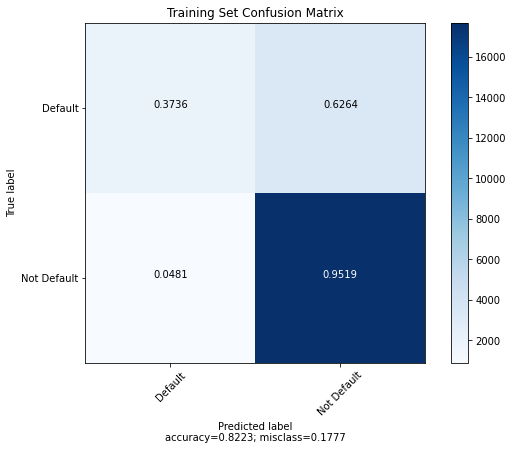

In [ ]:
plot_confusion_matrix(cm=train_confusion, target_names = ['Default', 'Not Default'], title = 'Training Set Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_train, Train_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89     18578
     Default       0.69      0.37      0.49      5367

    accuracy                           0.82     23945
   macro avg       0.77      0.66      0.69     23945
weighted avg       0.81      0.82      0.80     23945



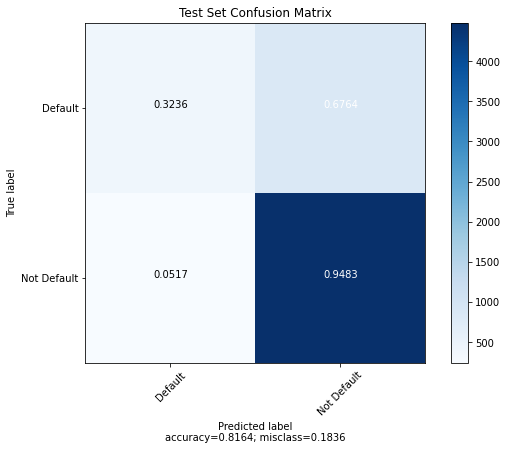

In [ ]:
plot_confusion_matrix(cm=test_confusion, target_names = ['Default', 'Not Default'], title = 'Test Set Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_test, Test_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      4723
     Default       0.63      0.32      0.43      1264

    accuracy                           0.82      5987
   macro avg       0.73      0.64      0.66      5987
weighted avg       0.79      0.82      0.79      5987



This model is similar to the Logistic Regression model. Low precision means that it doesn't do a great job correctly identifying individuals who default. The model is a pretty good job identifying individuals who do not default.

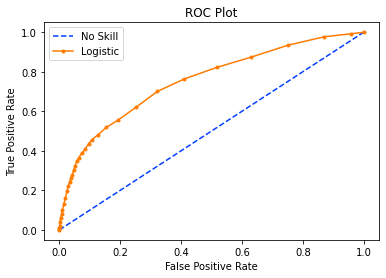

In [ ]:
# predict probabilities
yhat = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
knn_auc = roc_auc_score(y_test, Test_predictions)

In [ ]:
# to be used in results section; ROC comparison
y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_knn)
auc2 = roc_auc_score(y_test, y_pred_proba_knn)

#### *Random Forests*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = ensemble.RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

print('Training score: %s' % np.mean(cross_val_score(rfc, X_train, y_train, cv=10)))
print('Test score: %s' % np.mean(cross_val_score(rfc, X_test, y_test, cv=10)))

Training score: 0.8129878105144559
Test score: 0.8097537143846211


In [ ]:
Train_predictions = rfc.predict(X_train)
Test_predictions = rfc.predict(X_test)

train_confusion = confusion_matrix(y_train, Train_predictions, labels=[1,0])
test_confusion = confusion_matrix(y_test, Test_predictions, labels=[1,0])
print(train_confusion)
print(test_confusion)

[[ 5346    21]
 [    4 18574]]
[[ 429  835]
 [ 298 4425]]


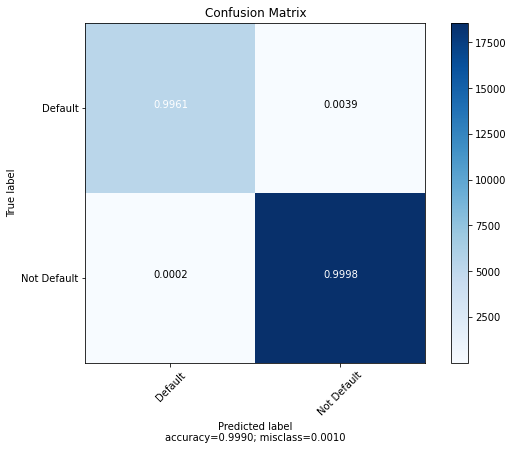

In [ ]:
plot_confusion_matrix(cm=train_confusion, target_names = ['Default', 'Not Default'], title = 'Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_train, Train_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       1.00      1.00      1.00     18578
     Default       1.00      1.00      1.00      5367

    accuracy                           1.00     23945
   macro avg       1.00      1.00      1.00     23945
weighted avg       1.00      1.00      1.00     23945



Woah. That looks like an overfit. Let's look at the test set.

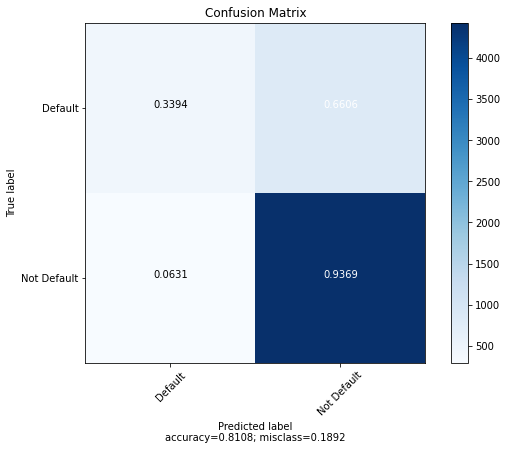

In [ ]:
plot_confusion_matrix(cm=test_confusion, target_names = ['Default', 'Not Default'], title = 'Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_test, Test_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.94      0.89      4723
     Default       0.59      0.34      0.43      1264

    accuracy                           0.81      5987
   macro avg       0.72      0.64      0.66      5987
weighted avg       0.79      0.81      0.79      5987



Yikes, a little better than the LR and KNN, but still not great.

In [ ]:
# this takes a long time to run
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=42)

params = {'n_estimators': [100,200,300,400,500],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth':[2,3,4,5],
          'criterion':['criterion', 'gini']}
cv_rfc = GridSearchCV(rfc, params, cv=3, n_jobs=-1, verbose=True)
cv_rfc.fit(X_train, y_train)

In [ ]:
cv_rfc.best_params_

In [ ]:
cv_rfc.best_score_

In [ ]:
rfc = RandomForestClassifier(criterion='gini', max_depth=5, max_features='auto', n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Train_predictions = rfc.predict(X_train)
Test_predictions = rfc.predict(X_test)

train_confusion = confusion_matrix(y_train, Train_predictions, labels=[1,0])
test_confusion = confusion_matrix(y_test, Test_predictions, labels=[1,0])
print(train_confusion)
print(test_confusion)

[[ 1853  3514]
 [  668 17910]]
[[ 376  888]
 [ 202 4521]]


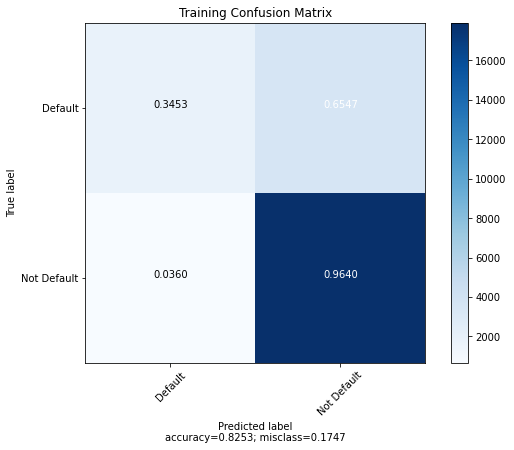

In [ ]:
plot_confusion_matrix(cm=train_confusion, target_names = ['Default', 'Not Default'], title = 'Training Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_train, Train_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.96      0.90     18578
     Default       0.74      0.35      0.47      5367

    accuracy                           0.83     23945
   macro avg       0.79      0.65      0.68     23945
weighted avg       0.81      0.83      0.80     23945



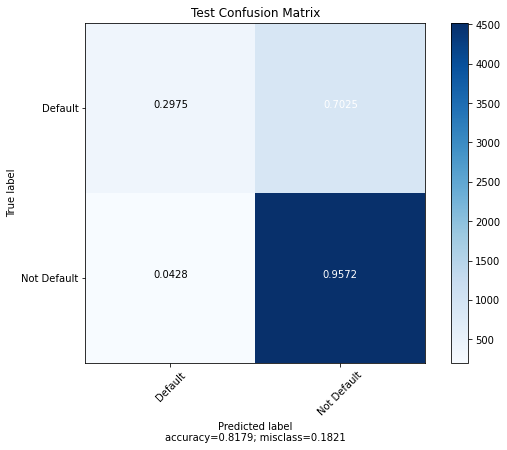

In [ ]:
plot_confusion_matrix(cm=test_confusion, target_names = ['Default', 'Not Default'], title = 'Test Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_test, Test_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.96      0.89      4723
     Default       0.65      0.30      0.41      1264

    accuracy                           0.82      5987
   macro avg       0.74      0.63      0.65      5987
weighted avg       0.80      0.82      0.79      5987



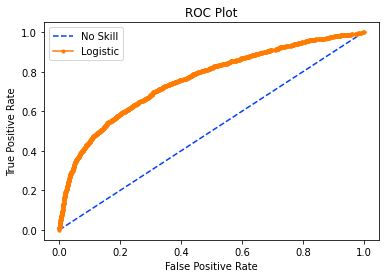

In [ ]:
# predict probabilities
yhat = rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
rfc_auc = roc_auc_score(y_test, Test_predictions)

In [ ]:
y_pred_proba_rfc = rfc.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba_rfc)
auc3 = roc_auc_score(y_test, y_pred_proba_rfc)

In [ ]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
importances = rfc.feature_importances_

In [ ]:
rfc_import = pd.DataFrame(importances, index=feature_names)
rfc_import[0].sort_values(ascending=False).head(5)

feature 2    0.22
feature 12   0.21
feature 3    0.13
feature 22   0.07
feature 1    0.07
Name: 0, dtype: float64

Comparing feature importances for the Random Forest model.

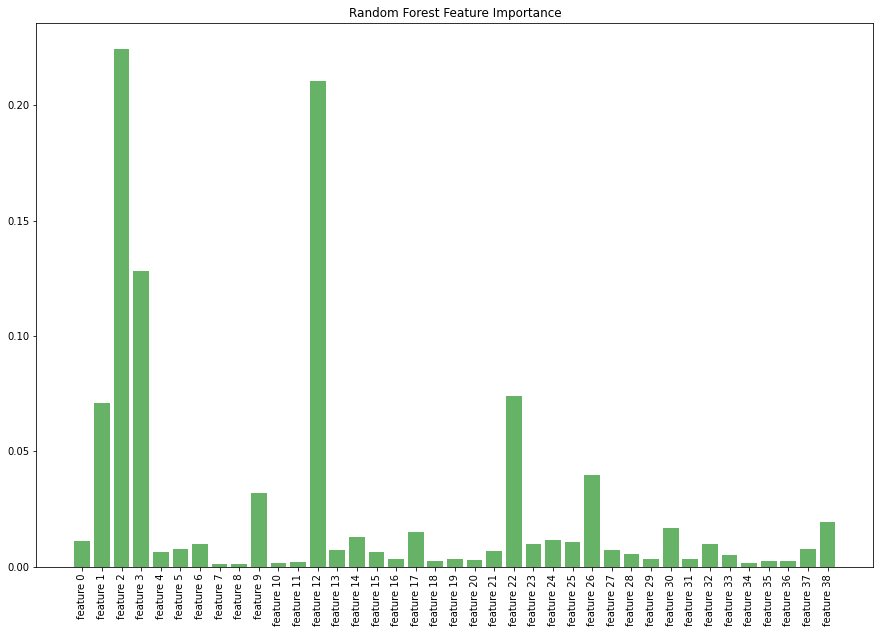

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(rfc_import.index, height=rfc_import[0], color='g', alpha=.6)
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

#### *Boosting*

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

print('training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('test score: {:.3f}'.format(clf.score(X_test, y_test)))

training score: 0.836
test score: 0.815


In [ ]:
Train_predictions = clf.predict(X_train)
Test_predictions = clf.predict(X_test)

train_confusion = confusion_matrix(y_train, Train_predictions, labels=[1,0])
test_confusion = confusion_matrix(y_test, Test_predictions, labels=[1,0])
print(train_confusion)
print(test_confusion)

[[ 2204  3163]
 [  771 17807]]
[[ 426  838]
 [ 269 4454]]


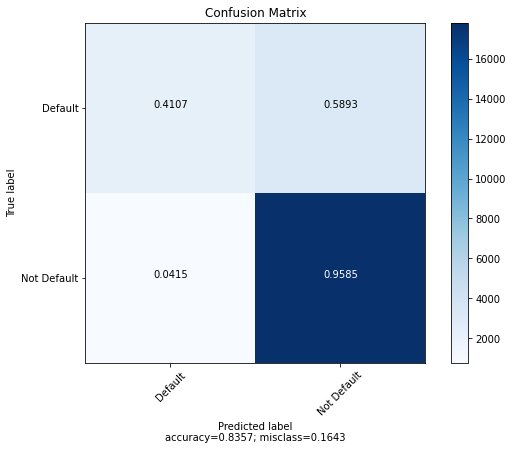

In [ ]:
plot_confusion_matrix(cm=train_confusion, target_names = ['Default', 'Not Default'], title = 'Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_train, Train_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.85      0.96      0.90     18578
     Default       0.74      0.41      0.53      5367

    accuracy                           0.84     23945
   macro avg       0.80      0.68      0.71     23945
weighted avg       0.82      0.84      0.82     23945



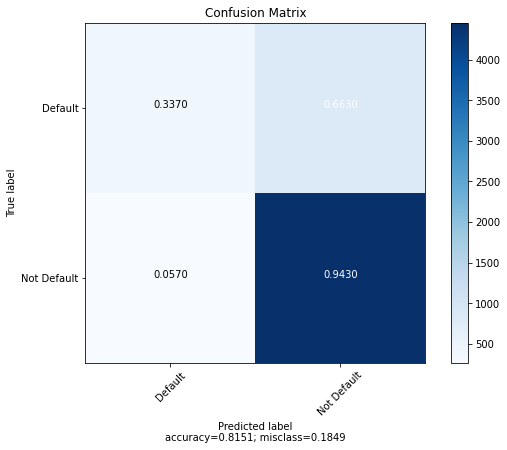

In [ ]:
plot_confusion_matrix(cm=test_confusion, target_names = ['Default', 'Not Default'], title = 'Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_test, Test_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.94      0.89      4723
     Default       0.61      0.34      0.43      1264

    accuracy                           0.82      5987
   macro avg       0.73      0.64      0.66      5987
weighted avg       0.79      0.82      0.79      5987



In [ ]:
# this takes a long time to run
gbc = ensemble.GradientBoostingClassifier(random_state=42)

params = {'criterion': ['friedman_mse'],
 'max_depth': [2,4],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2,5],
 'min_samples_leaf': [1,2]}

cv_gbc = GridSearchCV(gbc, params, cv=3, n_jobs=2, verbose=True)
cv_gbc.fit(X_train, y_train)

In [ ]:
cv_gbc.best_score_

In [ ]:
cv_gbc.best_estimator_

In [ ]:
gbc = ensemble.GradientBoostingClassifier(criterion='friedman_mse', max_depth=4, max_features='sqrt', min_samples_leaf=2, min_samples_split=5)
gbc.fit(X_train, y_train)

print('training score: {:.3f}'.format(gbc.score(X_train, y_train)))
print('test score: {:.3f}'.format(gbc.score(X_test, y_test)))

training score: 0.838
test score: 0.817


In [ ]:
Train_predictions = gbc.predict(X_train)
Test_predictions = gbc.predict(X_test)

train_confusion = confusion_matrix(y_train, Train_predictions, labels=[1,0])
test_confusion = confusion_matrix(y_test, Test_predictions, labels=[1,0])
print(train_confusion)
print(test_confusion)

[[ 2219  3148]
 [  729 17849]]
[[ 430  834]
 [ 263 4460]]


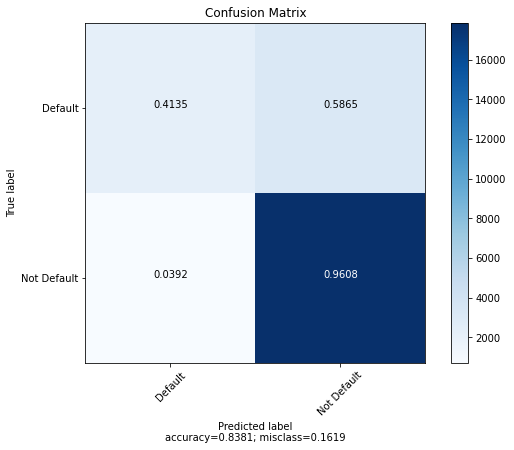

In [ ]:
plot_confusion_matrix(cm=train_confusion, target_names = ['Default', 'Not Default'], title = 'Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_train, Train_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.85      0.96      0.90     18578
     Default       0.75      0.41      0.53      5367

    accuracy                           0.84     23945
   macro avg       0.80      0.69      0.72     23945
weighted avg       0.83      0.84      0.82     23945



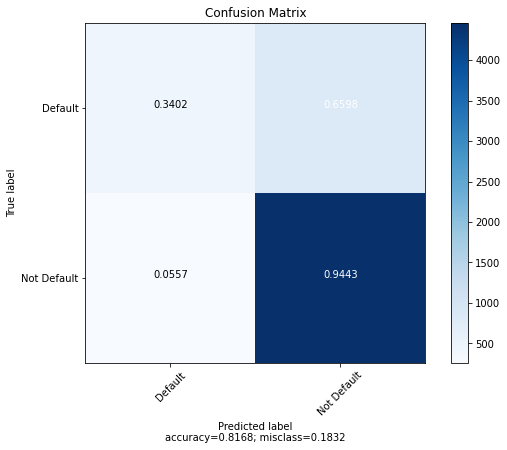

In [ ]:
plot_confusion_matrix(cm=test_confusion, target_names = ['Default', 'Not Default'], title = 'Confusion Matrix',normalize=True)

In [ ]:
report = classification_report(y_test, Test_predictions, target_names=['Not Default', 'Default'])
print(report)

              precision    recall  f1-score   support

 Not Default       0.84      0.94      0.89      4723
     Default       0.62      0.34      0.44      1264

    accuracy                           0.82      5987
   macro avg       0.73      0.64      0.66      5987
weighted avg       0.80      0.82      0.80      5987



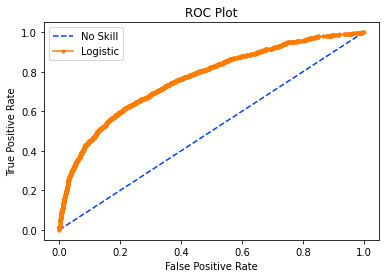

In [ ]:
# predict probabilities
yhat = gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
gbc_auc = roc_auc_score(y_test, Test_predictions)

In [ ]:
y_pred_proba_gbc = gbc.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = roc_curve(y_test, y_pred_proba_gbc)
auc4 = roc_auc_score(y_test, y_pred_proba_gbc)

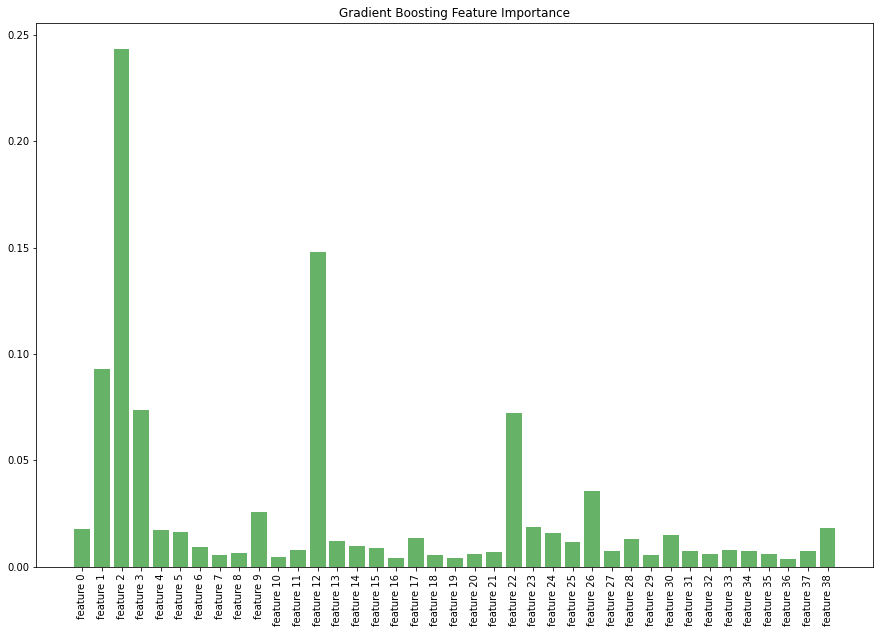

In [ ]:
importances = gbc.feature_importances_
rfc_import = pd.DataFrame(importances, index=feature_names)
rfc_import[0].sort_values(ascending=False).head(5)

plt.figure(figsize=(15,10))
plt.bar(rfc_import.index, height=rfc_import[0], color='g', alpha=.6)
plt.title('Gradient Boosting Feature Importance')
plt.xticks(rotation=90)
plt.show()

## Results and Discussion:

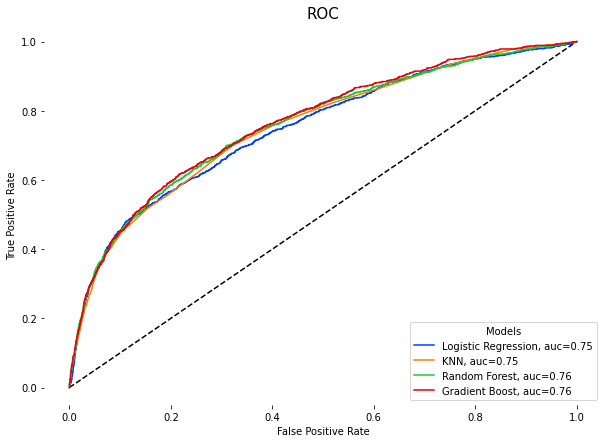

In [ ]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Regression, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="KNN, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Random Forest, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Gradient Boost, auc="+str(round(auc4,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)

In conclusion, the 4 models evaluated in this project showed accuracies between .80 and .83.The target variable is skewed, so precision, recall, and ROC AUC was used as the comparison matrics for the data. Random Forest and Gradient Boosting showed the best results. 
The Gradient Boost shows a slight improvement upon the other three models, with an AUC score of 0.76. As stated earlier the target variable is skewed, so precision, recall, and AUC are used to compare the model results.

## Sources: 

**[1] Raw data:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

**[2] Literature:** [Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.](https://bradzzz.gitbooks.io/ga-seattle-dsi/content/dsi/dsi_05_classification_databases/2.1-lesson/assets/datasets/DefaultCreditCardClients_yeh_2009.pdf)

**[3] Credit Limits:** https://www.nerdwallet.com/article/finance/30-percent-ideal-credit-utilization-ratio-rule

**[4] Exceeding Credit Limits:** https://www.cnbc.com/select/exceeding-credit-limit/

**[5] Credit Risk:** https://www.investopedia.com/terms/c/creditrisk.asp

**[6] Confusion Matrix Code:** http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

**[7] Kaggle Variable Discussion:** https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608
